# Navigation Task with Multiple Targets

In [2]:
import torch
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from model.kohonen_som import KohonenSOM
from model.som_q_learner import SOMQLearner, SOMQLearnerAllNeighbor
from custom_env.navigation_task import NavigationTaskMultiTarget # distance of 0.2
import pickle
%matplotlib inline

path exception


## Pre-Training Input and (Pose) Output SOM

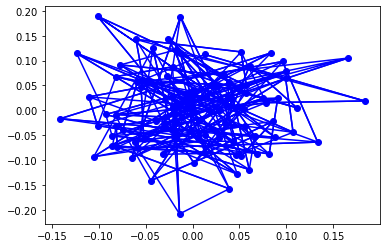

/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


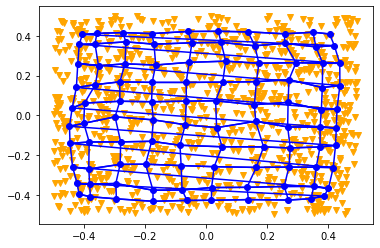

tensor([[ 0.4054,  0.4097],
        [ 0.3510,  0.4185],
        [ 0.2577,  0.4105],
        [ 0.1380,  0.4204],
        [ 0.0407,  0.4231],
        [-0.0589,  0.4224],
        [-0.1778,  0.4116],
        [-0.2728,  0.4167],
        [-0.3575,  0.4125],
        [-0.4051,  0.4072],
        [ 0.4208,  0.3512],
        [ 0.3605,  0.3446],
        [ 0.2583,  0.3626],
        [ 0.1601,  0.3502],
        [ 0.0497,  0.3673],
        [-0.0461,  0.3652],
        [-0.1702,  0.3583],
        [-0.2623,  0.3700],
        [-0.3637,  0.3597],
        [-0.4153,  0.3578],
        [ 0.4388,  0.2619],
        [ 0.3827,  0.2623],
        [ 0.2953,  0.2651],
        [ 0.1736,  0.2620],
        [ 0.0647,  0.2727],
        [-0.0552,  0.2667],
        [-0.1648,  0.2533],
        [-0.2653,  0.2593],
        [-0.3522,  0.2492],
        [-0.4201,  0.2607],
        [ 0.4391,  0.1501],
        [ 0.3814,  0.1399],
        [ 0.2722,  0.1796],
        [ 0.1654,  0.1693],
        [ 0.0549,  0.1670],
        [-0.0648,  0

In [2]:
"""
Initialization
"""
x = torch.rand(1000, 2)-0.5
maxitr = 10**4*5
som = KohonenSOM(total_nodes=100, node_size=2, update_iterations=maxitr)
reshaped = som.w.reshape(10, 10, 2)
for v in range(10):
    plt.plot(reshaped[:, v, 0].numpy(), reshaped[:, v, 1].numpy(), marker='None', linestyle='-', color='blue')
    plt.plot(reshaped[v, :, 0].numpy(), reshaped[v, :, 1].numpy(), marker='None', linestyle='-', color='blue')
plt.plot(som.w[:, 0].numpy(), som.w[:, 1].numpy(), marker='o', color='blue')
plt.show()

"""
Training
"""
for t in range(maxitr):
    a, c = som.update(x, t, 0)
    
pose_som_filehandler = open("../data/selector_pose_ik/navigation_task_multi_target/pose_som.obj", 'wb')
pickle.dump(som, pose_som_filehandler)
    
"""
Visualization of Trained Model
"""
plt.plot(x[:, 0].numpy(), x[:, 1].numpy(), marker='v', linestyle='None', color='orange')

pose_som_filehandler = open("../data/selector_pose_ik/navigation_task_multi_target/pose_som.obj", 'rb')
pose_som = pickle.load(pose_som_filehandler)

reshaped = som.w.reshape(10, 10, 2)
for v in range(10):
    plt.plot(reshaped[:, v, 0].numpy(), reshaped[:, v, 1].numpy(), marker='None', linestyle='-', color='blue')
    plt.plot(reshaped[v, :, 0].numpy(), reshaped[v, :, 1].numpy(), marker='None', linestyle='-', color='blue')
plt.plot(som.w[:, 0].numpy(), som.w[:, 1].numpy(), marker='o', color='blue')
plt.show()
som.w

In [6]:
pose_som_filehandler = open("../data/selector_pose_ik/navigation_task_multi_target/pose_som.obj", 'rb')
pose_som = pickle.load(pose_som_filehandler)

## Training SOM Q-Learner (Selector)

### Only the state space is updated using self organization

/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/som_q_learner.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


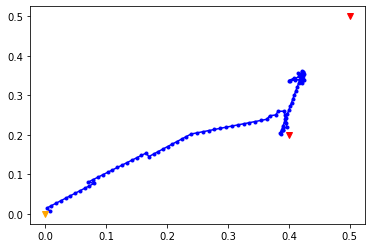

[True, False]
99 26.449586554709366


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/som_q_learner.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


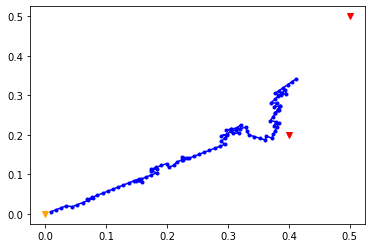

[True, False]
199 28.08501893286879


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/som_q_learner.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


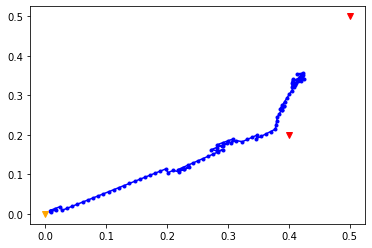

[True, False]
299 26.823864541393945


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/som_q_learner.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


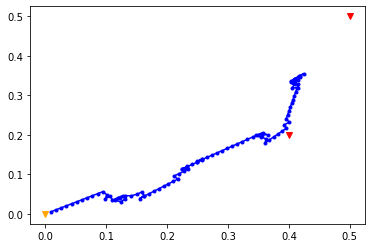

[True, False]
399 27.67535127579844


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/som_q_learner.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


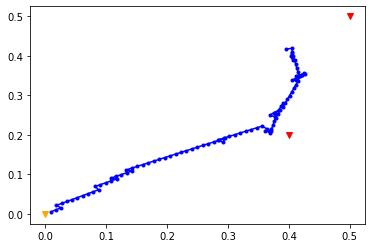

[True, False]
499 27.807795242155333


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/som_q_learner.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


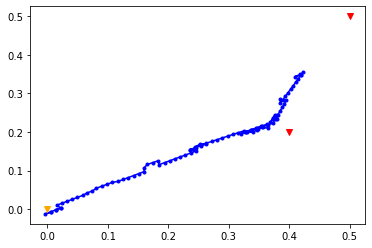

[True, False]
599 23.410917571820303


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/som_q_learner.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


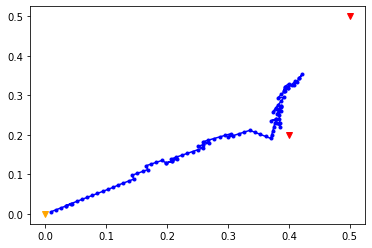

[True, False]
699 27.94664960977337


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/som_q_learner.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


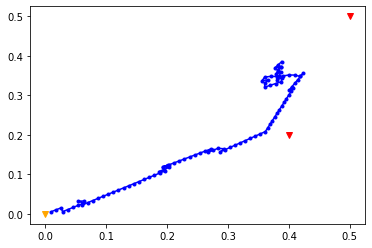

[True, False]
799 27.079626536082685


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/som_q_learner.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


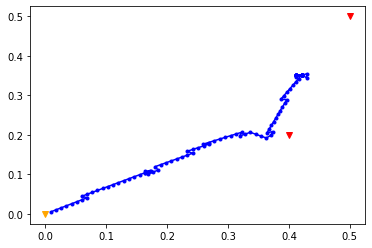

[True, False]
899 28.72983456270823


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/som_q_learner.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


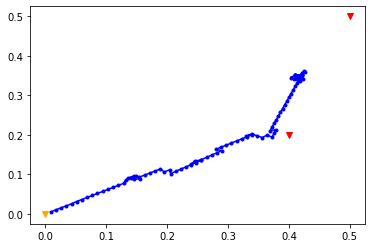

[True, False]
999 29.114877844257986


In [4]:
manager_maxitr = 10 ** 3
maxtime = 100
epsilon = 0.2
torch.manual_seed(0)
random.seed(0)

selector = SOMQLearner(total_nodes=100, state_dim = 2, action_som = pose_som, update_iterations=manager_maxitr)
task = NavigationTaskMultiTarget()

for epoch in range(manager_maxitr):
    # for visualization
    total_return = 0
    state_trajectory = []
    obs = task.state()
    
    for t in range(maxtime):
        obs = task.state()
        
        # epsilon greedy
        if random.random() > epsilon:
            pose_index = selector.get_action(obs) # deterministic

        else:
            pose_index = random.randrange(pose_som.total_nodes)
        
        # step forward
        reward, next_obs = task.step(pose_som.w[pose_index])
        
        # online training
        selector.action_q_learning(
            current_state = obs,
            next_state = next_obs,
            action_index = pose_index,
            reward = reward,
            t = epoch)
        
        obs = next_obs
        state_trajectory.append(np.array(obs))
        total_return += (0.9 ** t) * reward
        
    if epoch % 100 == 99:
        plt.plot(np.array(state_trajectory)[:, 0], np.array(state_trajectory)[:, 1], marker='.', linestyle='-', color='blue')
        plt.plot(0.0, 0.0, marker='v', linestyle='None', color='orange')
        
        for i in range(task.all_goals.shape[0]):
            plt.plot(np.array(task.all_goals[i])[0], np.array(task.all_goals[i])[1], marker='v', linestyle='None', color='red')
        
        plt.show()
        print(task.goal_completed)
        print(epoch, total_return)
    
    task.reset()
    
som_q_learner_filehandler = open("../data/selector_pose_ik/navigation_task_multi_target/som_q_learner.obj", 'wb')
pickle.dump(selector, som_q_learner_filehandler)

/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/som_q_learner.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


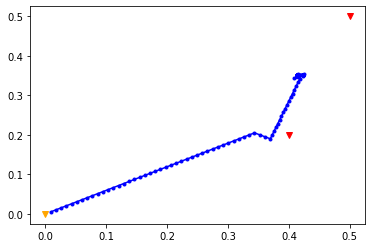

[True, False]
30.353538448175716


In [5]:
# for visualization
total_return = 0
state_trajectory = []

som_q_learner_filehandler = open("../data/selector_pose_ik/navigation_task_multi_target/som_q_learner.obj", 'rb')
som_q_learner = pickle.load(som_q_learner_filehandler)

for t in range(maxtime): 
    obs = task.state()
    pose_index = som_q_learner.get_action(obs) # deterministic

    # step forward
    reward, next_obs = task.step(pose_som.w[pose_index])

    obs = next_obs
    state_trajectory.append(np.array(obs))
    total_return += (0.9 ** t) * reward

plt.plot(np.array(state_trajectory)[:, 0], np.array(state_trajectory)[:, 1], marker='.', linestyle='-', color='blue')
plt.plot(0.0, 0.0, marker='v', linestyle='None', color='orange')

for i in range(task.all_goals.shape[0]):
    plt.plot(np.array(task.all_goals[i])[0], np.array(task.all_goals[i])[1], marker='v', linestyle='None', color='red')
        
plt.show()
print(task.goal_completed)
print(total_return)

task.reset()

### Both the state space and the Q-table are updated using self organization

/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/som_q_learner.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


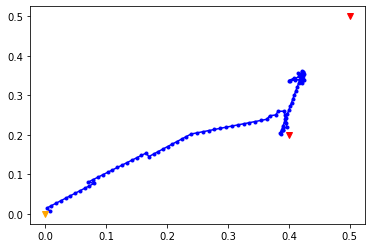

[True, False]
99 26.449586554709366


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/som_q_learner.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


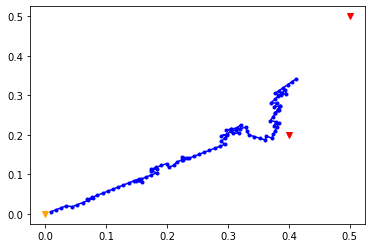

[True, False]
199 28.08501893286879


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/som_q_learner.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


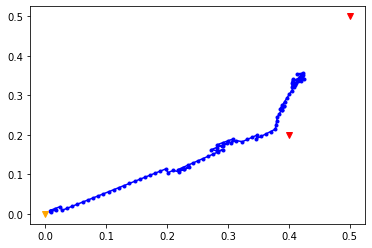

[True, False]
299 26.823864541393945


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/som_q_learner.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


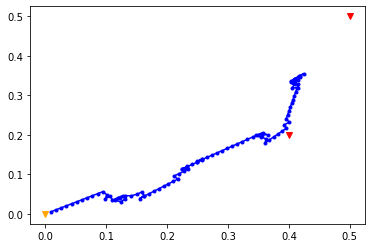

[True, False]
399 27.67535127579844


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/som_q_learner.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


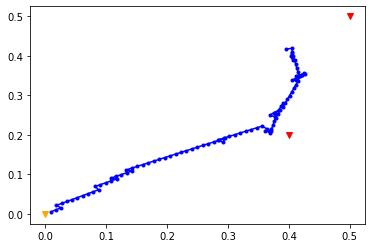

[True, False]
499 27.807795242155333


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/som_q_learner.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


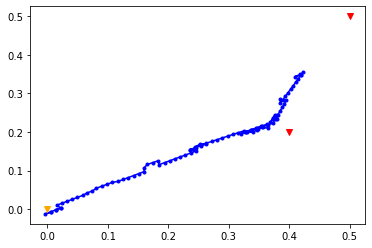

[True, False]
599 23.410917571820303


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/som_q_learner.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


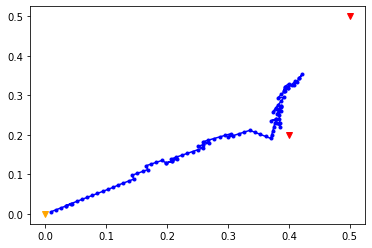

[True, False]
699 27.94664960977337


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/som_q_learner.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


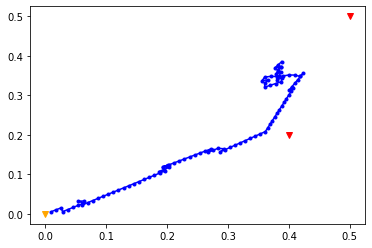

[True, False]
799 27.079626536082685


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/som_q_learner.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


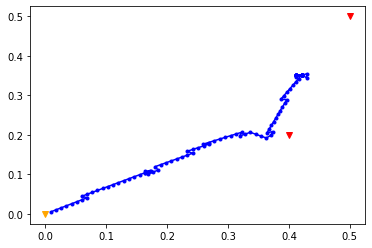

[True, False]
899 28.72983456270823


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/som_q_learner.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


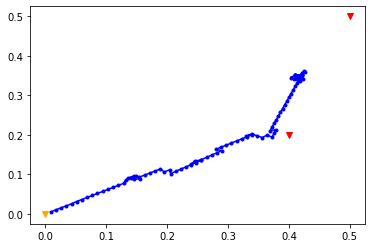

[True, False]
999 29.114877844257986


In [24]:
manager_maxitr = 10 ** 3
maxtime = 100
epsilon = 0.2
torch.manual_seed(0)
random.seed(0)

selector = SOMQLearner(total_nodes=100, state_dim = 2, action_som = pose_som, update_iterations=manager_maxitr)
task = NavigationTaskMultiTarget()

for epoch in range(manager_maxitr):
    # for visualization
    total_return = 0
    state_trajectory = []
    obs = task.state()
    
    for t in range(maxtime):
        obs = task.state()
        
        # epsilon greedy
        if random.random() > epsilon:
            pose_index = selector.get_action(obs) # deterministic

        else:
            pose_index = random.randrange(pose_som.total_nodes)
        
        # step forward
        reward, next_obs = task.step(pose_som.w[pose_index])
        
        # online training
        selector.action_q_learning(
            current_state = obs,
            next_state = next_obs,
            action_index = pose_index,
            reward = reward,
            t = epoch)
        
        obs = next_obs
        state_trajectory.append(np.array(obs))
        total_return += (0.9 ** t) * reward
        
    if epoch % 100 == 99:
        plt.plot(np.array(state_trajectory)[:, 0], np.array(state_trajectory)[:, 1], marker='.', linestyle='-', color='blue')
        plt.plot(0.0, 0.0, marker='v', linestyle='None', color='orange')
        
        for i in range(task.all_goals.shape[0]):
            plt.plot(np.array(task.all_goals[i])[0], np.array(task.all_goals[i])[1], marker='v', linestyle='None', color='red')
        
        plt.show()
        print(task.goal_completed)
        print(epoch, total_return)
    
    task.reset()
    
som_q_learner_all_neighbor_filehandler = open("../data/selector_pose_ik/navigation_task_multi_target/som_q_learner_all_neighbor.obj", 'wb')
pickle.dump(selector, som_q_learner_all_neighbor_filehandler)

/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/som_q_learner.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


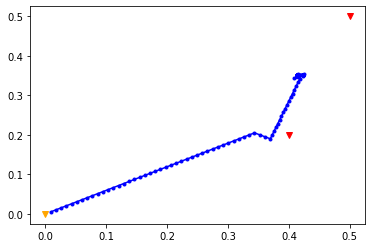

[True, False]
30.353538448175716


In [27]:
# for visualization
total_return = 0
state_trajectory = []

som_q_learner_all_neighbor_filehandler = open("../data/selector_pose_ik/navigation_task_multi_target/som_q_learner_all_neighbor.obj", 'rb')
som_q_learner_all_neighbor = pickle.load(som_q_learner_all_neighbor_filehandler)

for t in range(maxtime): 
    obs = task.state()
    pose_index = som_q_learner_all_neighbor.get_action(obs) # deterministic

    # step forward
    reward, next_obs = task.step(pose_som.w[pose_index])

    obs = next_obs
    state_trajectory.append(np.array(obs))
    total_return += (0.9 ** t) * reward

plt.plot(np.array(state_trajectory)[:, 0], np.array(state_trajectory)[:, 1], marker='.', linestyle='-', color='blue')
plt.plot(0.0, 0.0, marker='v', linestyle='None', color='orange')

for i in range(task.all_goals.shape[0]):
    plt.plot(np.array(task.all_goals[i])[0], np.array(task.all_goals[i])[1], marker='v', linestyle='None', color='red')
        
plt.show()
print(task.goal_completed)
print(total_return)

task.reset()

## Visualization of SOMs

In [31]:
from IPython.display import Image

def visualize_som(som, columns, labels = ["", ""], dim = 10, location = False):
    if location:
        reshaped_x = som.location[:, columns[0]].reshape(dim, dim)
        reshaped_y = som.location[:, columns[1]].reshape(dim, dim)
        for v in range(dim):
            plt.plot(reshaped_x[:, v].numpy(), reshaped_y[:, v].numpy(), marker='None', linestyle='-', color='blue')
            plt.plot(reshaped_x[v, :].numpy(), reshaped_y[v, :].numpy(), marker='None', linestyle='-', color='blue')
        plt.plot(som.location[:, columns[0]].numpy(), som.location[:, columns[1]].numpy(), marker='o', color='blue')
        plt.xlabel(labels[0])
        plt.ylabel(labels[1])
        plt.show()
        
    else:
        reshaped_x = som.w[:, columns[0]].reshape(dim, dim)
        reshaped_y = som.w[:, columns[1]].reshape(dim, dim)
        for v in range(dim):
            plt.plot(reshaped_x[:, v].numpy(), reshaped_y[:, v].numpy(), marker='None', linestyle='-', color='blue')
            plt.plot(reshaped_x[v, :].numpy(), reshaped_y[v, :].numpy(), marker='None', linestyle='-', color='blue')
        plt.plot(som.w[:, columns[0]].numpy(), som.w[:, columns[1]].numpy(), marker='o', color='blue')
        plt.xlabel(labels[0])
        plt.ylabel(labels[1])
        plt.show()
        
task = NavigationTaskMultiTarget()

In [32]:
from torch.nn.functional import softmax

def softmax_matrix(torch_matrix):
    matrix_size = torch_matrix.shape
    softmax_matrix = torch.zeros(matrix_size)
    for i in range(matrix_size[0]):
        softmax_matrix[i] = softmax(torch_matrix[i])
    return softmax_matrix

In [22]:
pose_som_filehandler = open("../data/selector_pose_ik/navigation_task_multi_target/pose_som.obj", 'rb')
pose_som = pickle.load(pose_som_filehandler)

som_q_learner_filehandler = open("../data/selector_pose_ik/navigation_task_multi_target/som_q_learner.obj", 'rb')
som_q_learner = pickle.load(som_q_learner_filehandler)

0


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


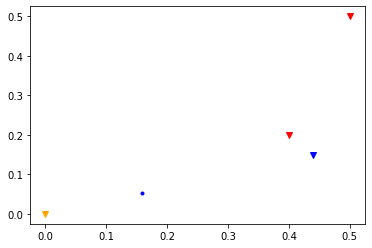

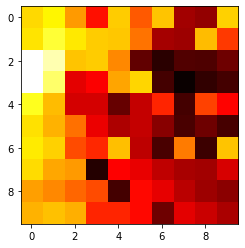

1


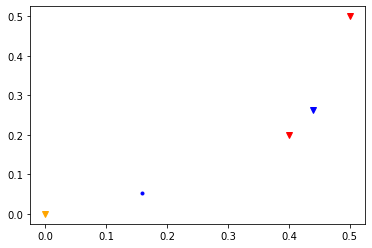

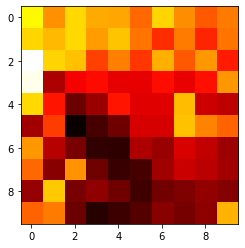

2


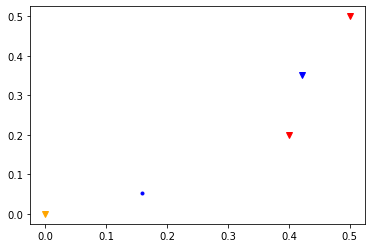

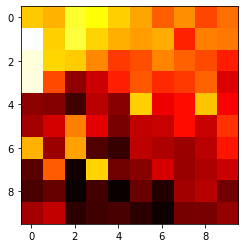

3


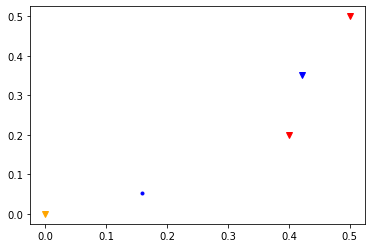

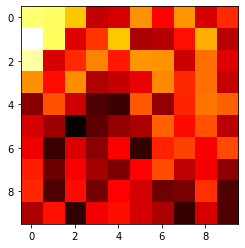

4


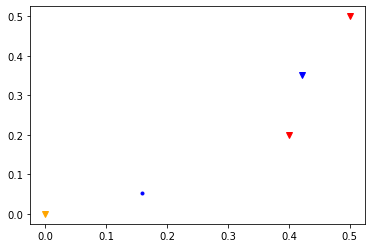

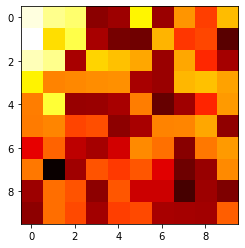

5


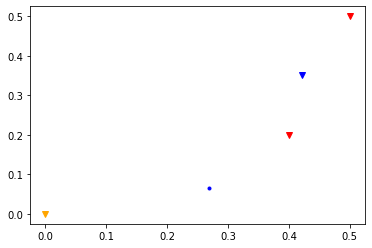

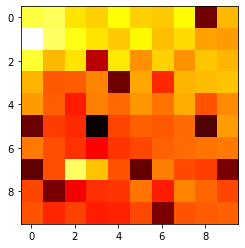

6


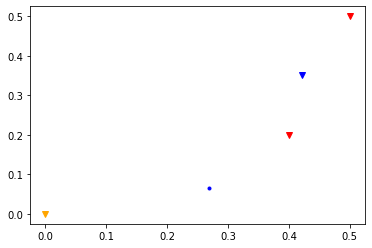

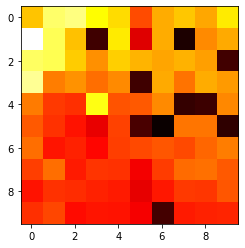

7


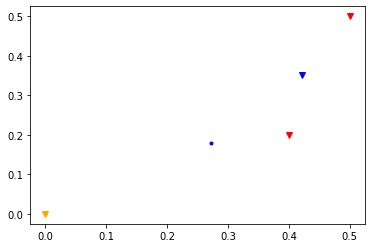

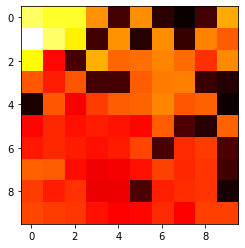

8


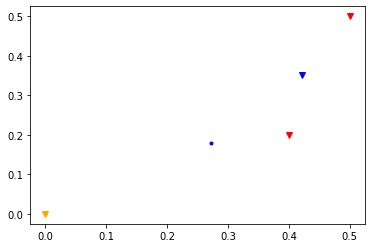

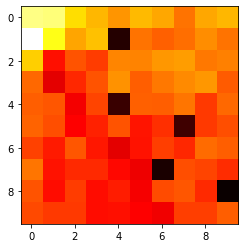

9


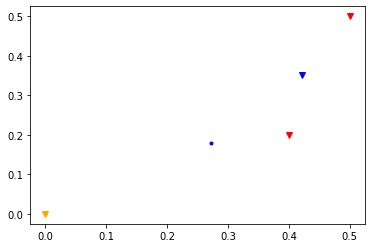

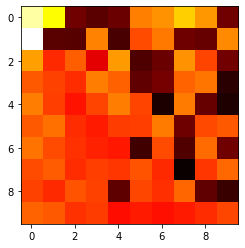

10


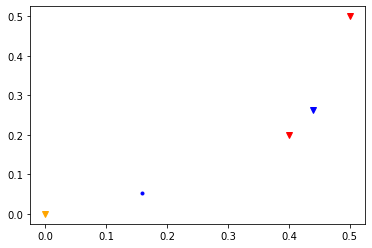

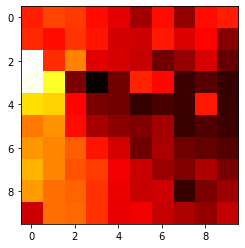

11


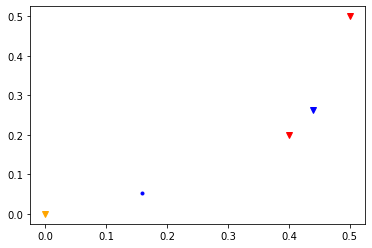

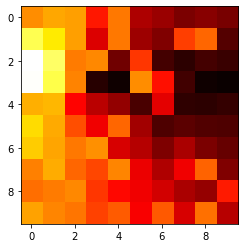

12


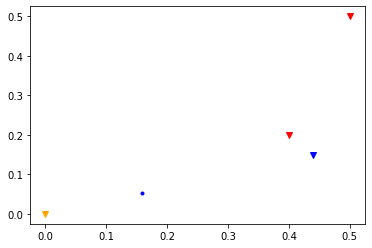

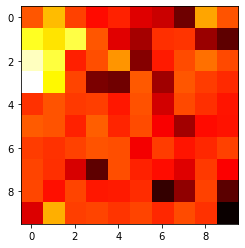

13


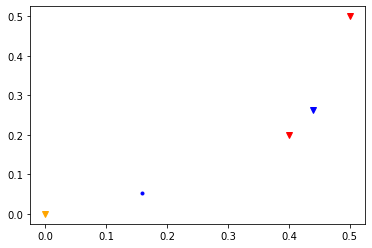

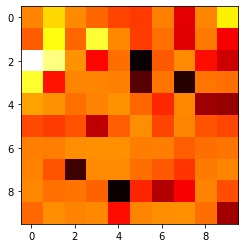

14


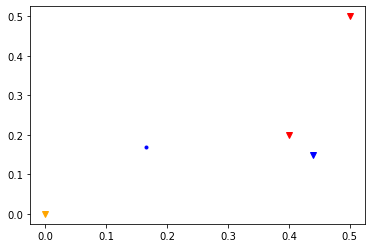

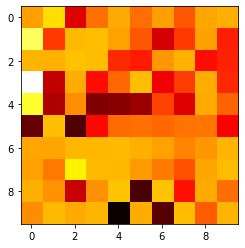

15


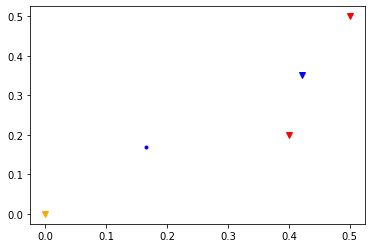

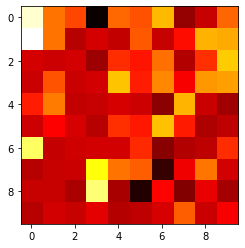

16


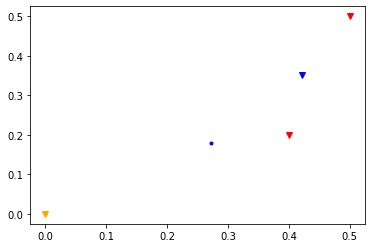

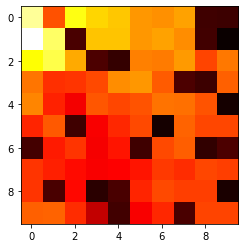

17


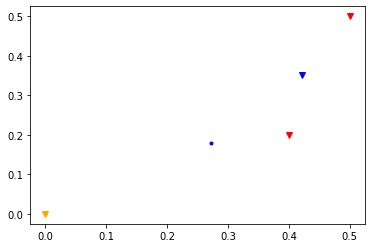

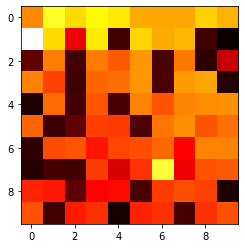

18


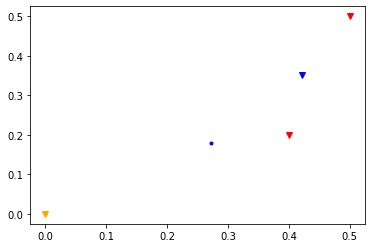

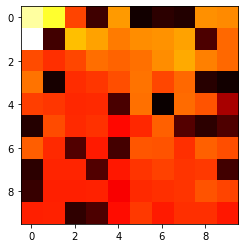

19


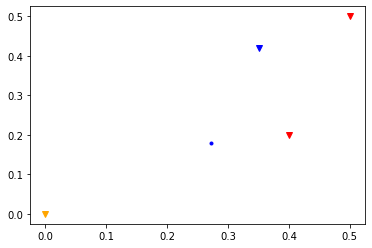

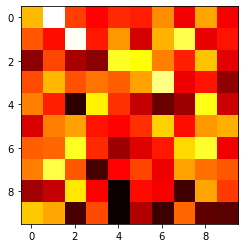

20


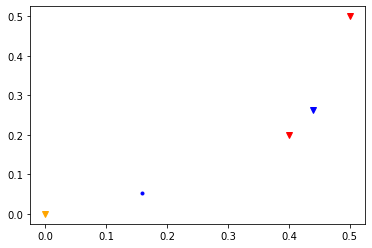

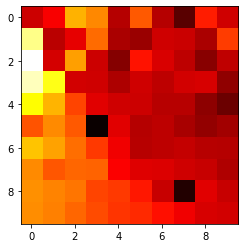

21


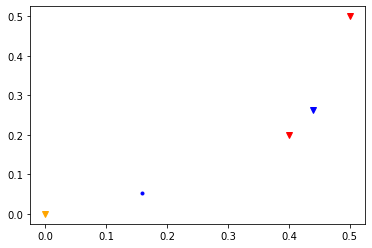

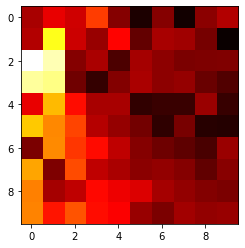

22


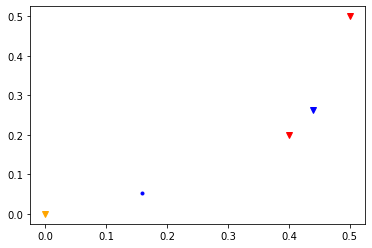

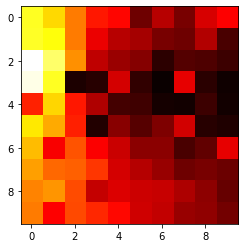

23


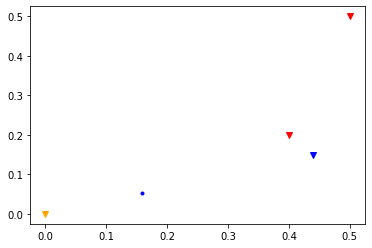

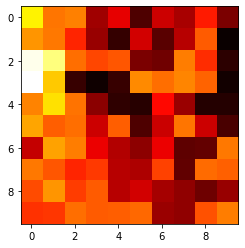

24


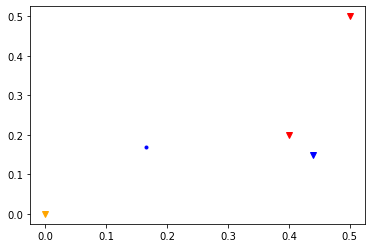

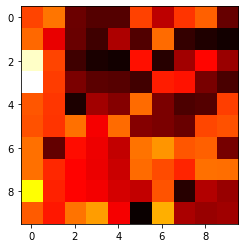

25


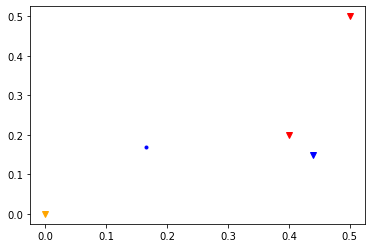

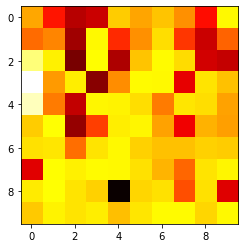

26


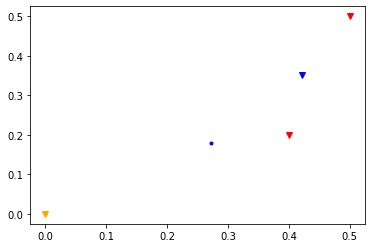

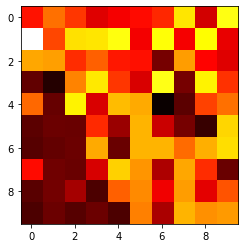

27


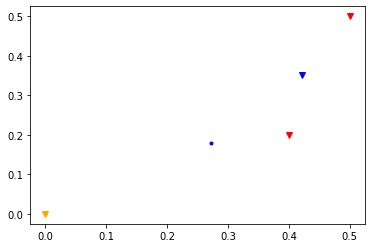

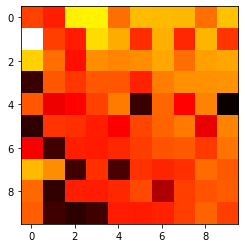

28


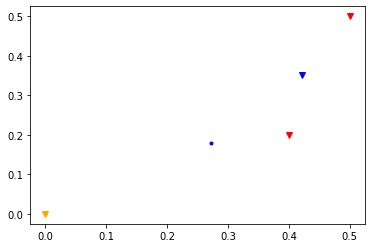

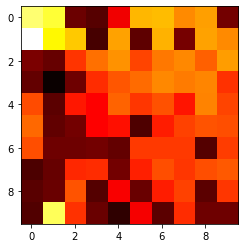

29


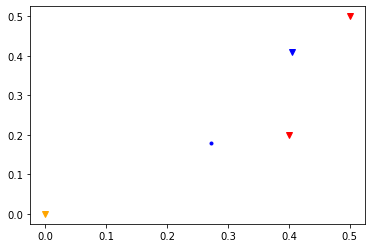

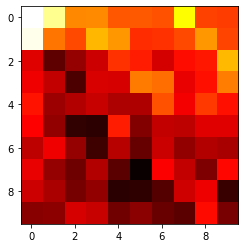

30


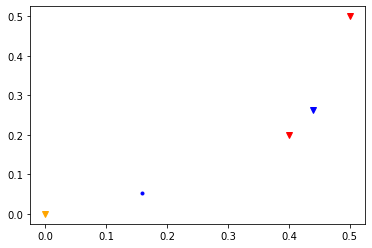

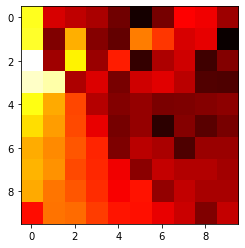

31


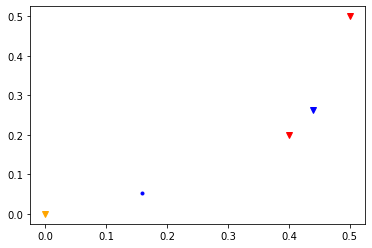

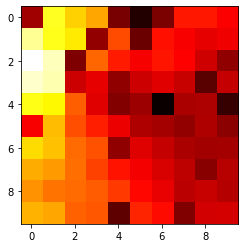

32


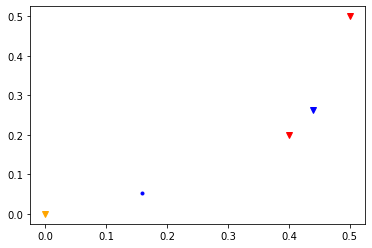

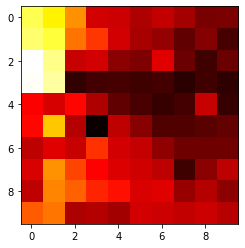

33


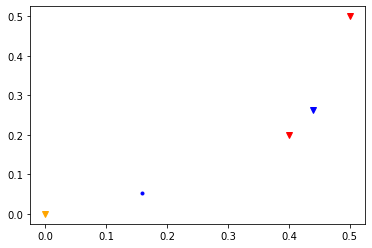

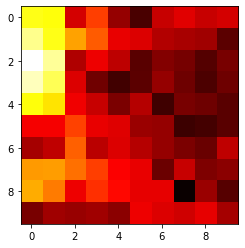

34


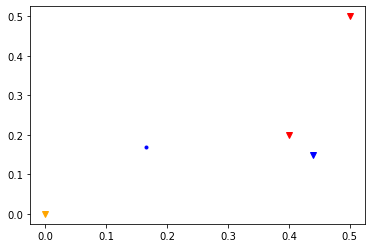

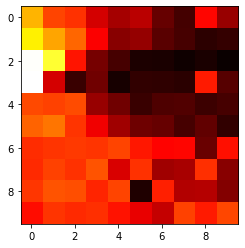

35


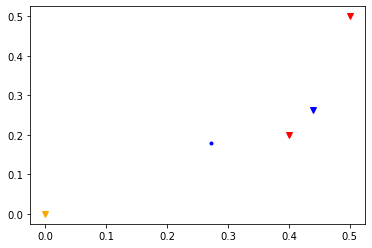

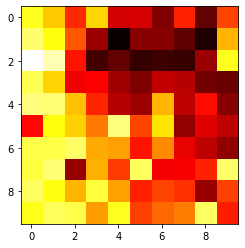

36


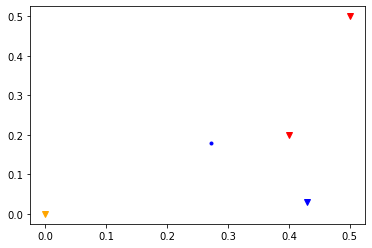

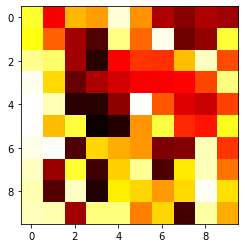

37


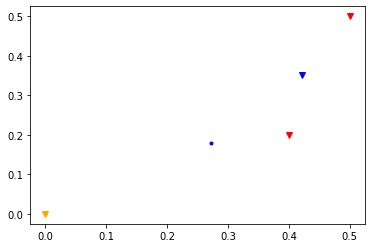

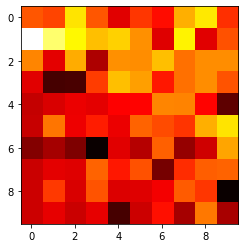

38


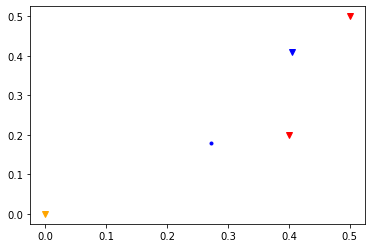

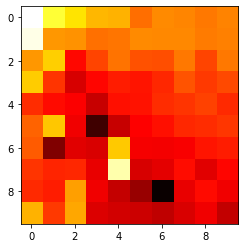

39


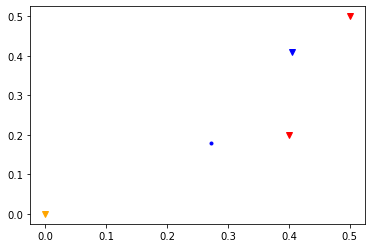

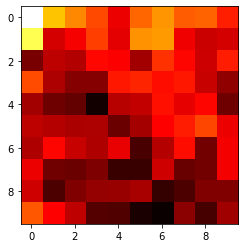

40


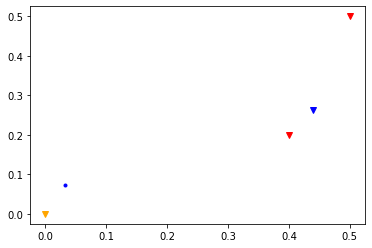

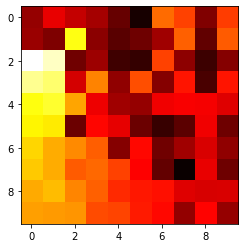

41


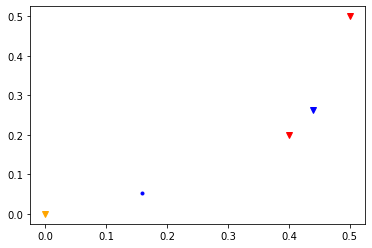

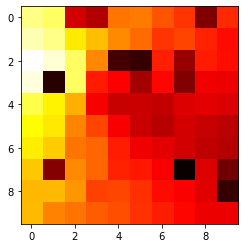

42


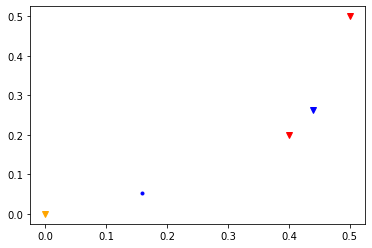

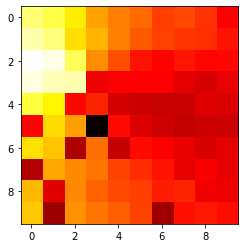

43


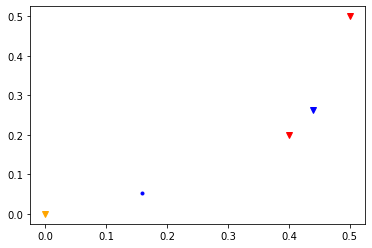

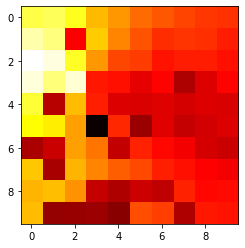

44


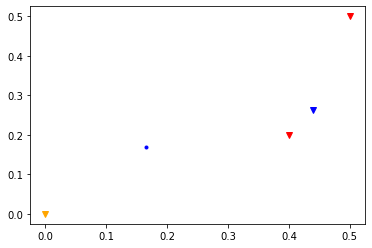

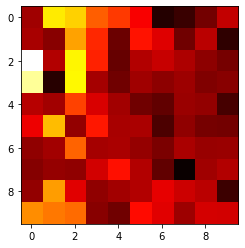

45


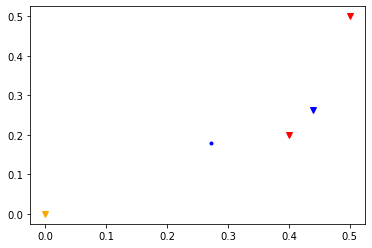

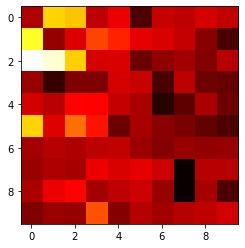

46


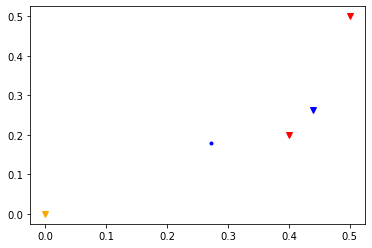

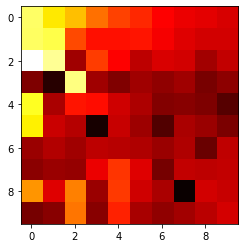

47


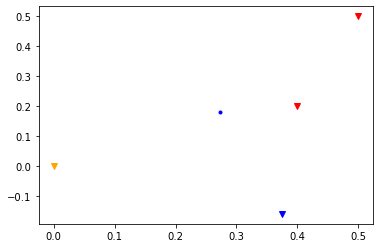

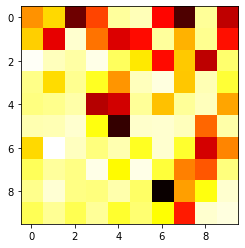

48


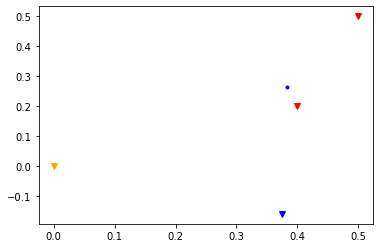

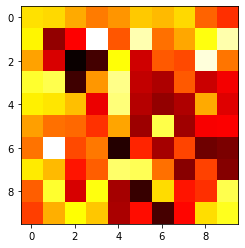

49


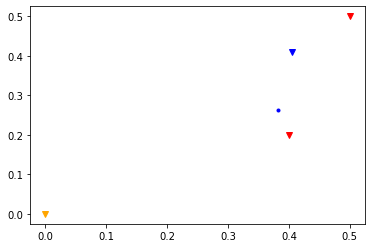

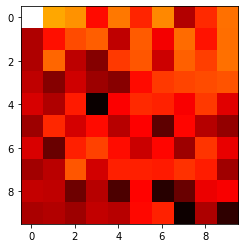

50


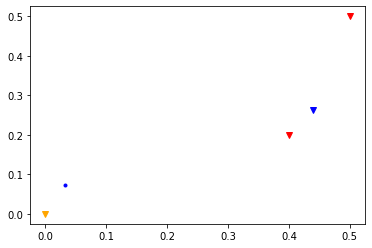

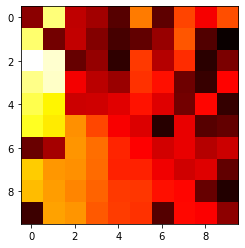

51


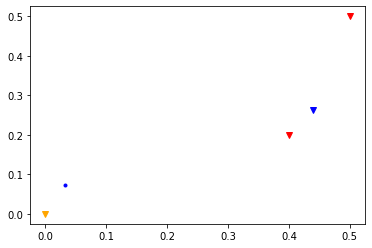

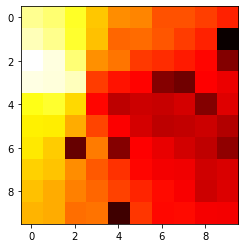

52


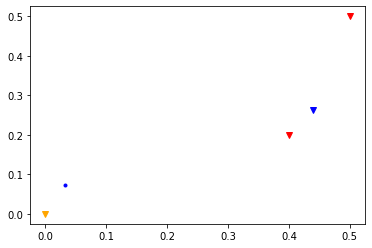

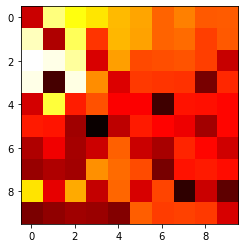

53


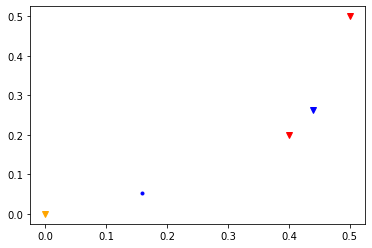

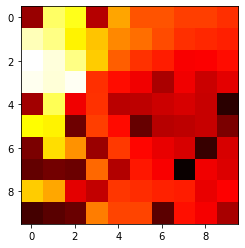

54


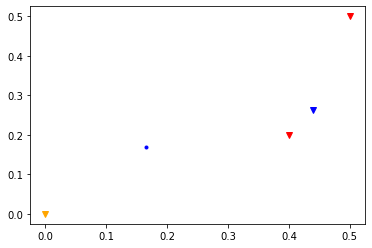

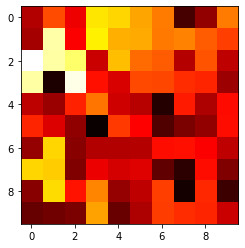

55


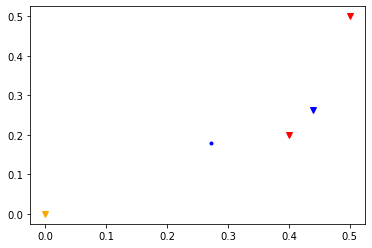

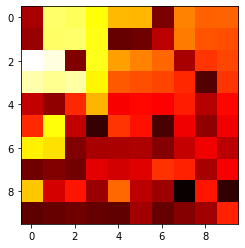

56


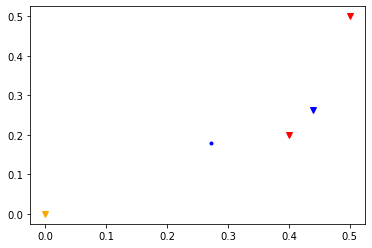

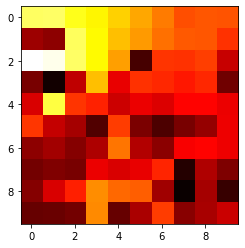

57


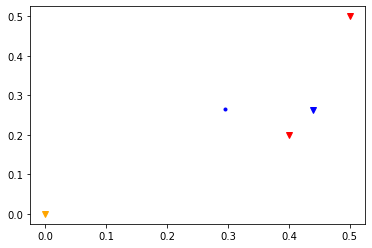

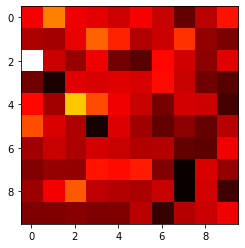

58


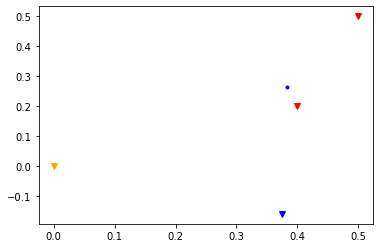

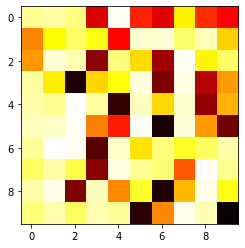

59


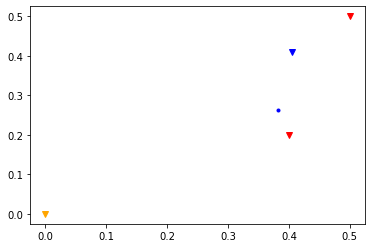

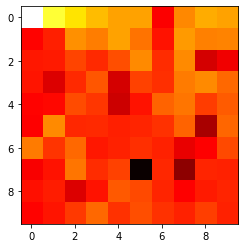

60


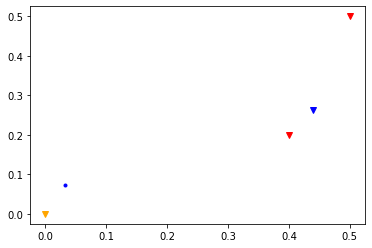

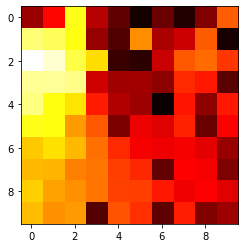

61


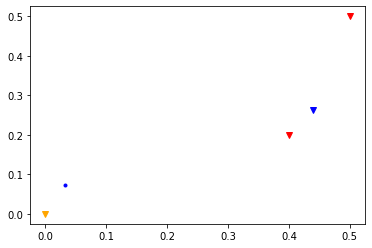

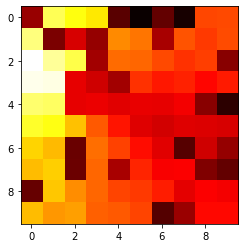

62


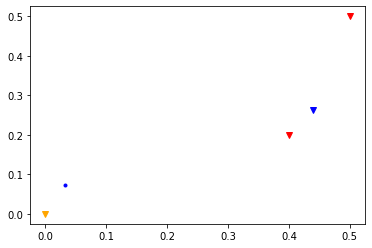

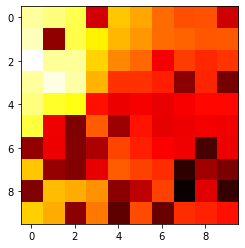

63


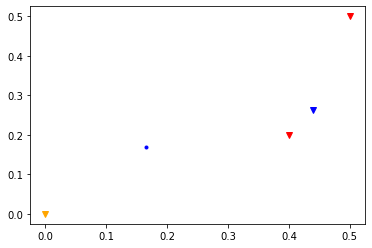

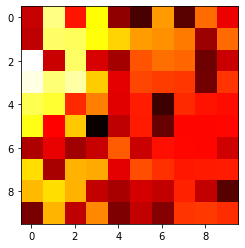

64


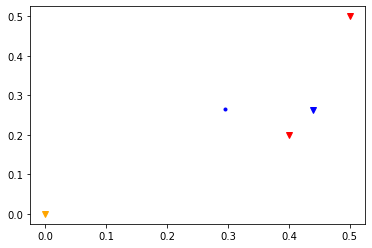

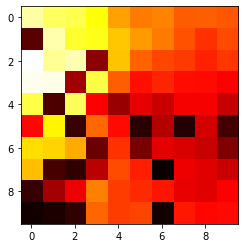

65


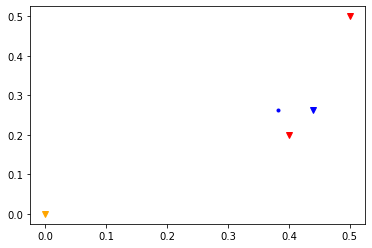

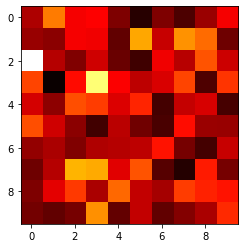

66


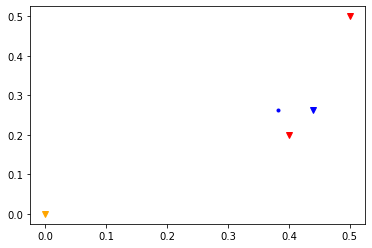

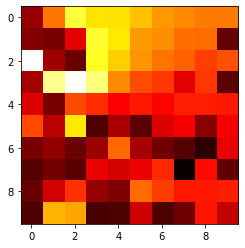

67


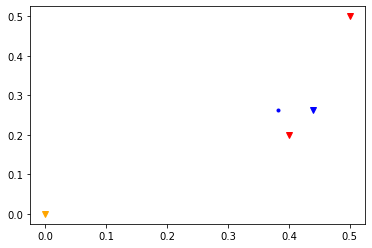

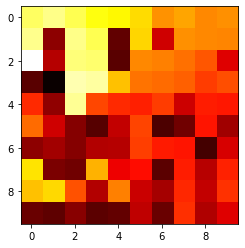

68


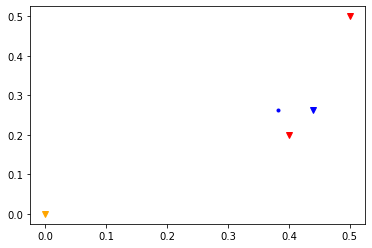

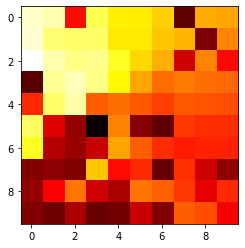

69


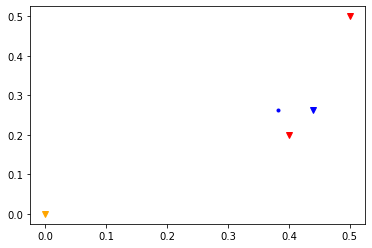

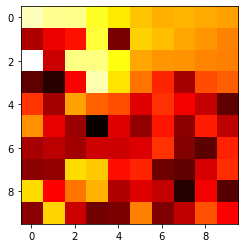

70


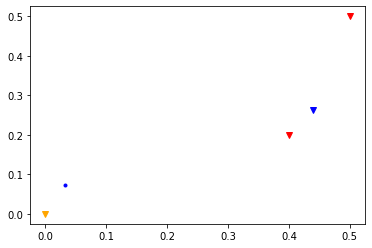

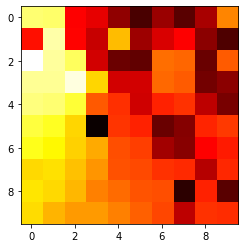

71


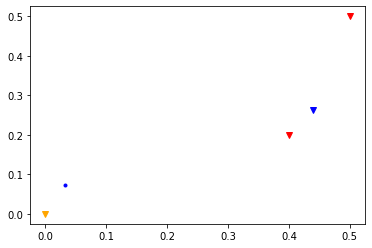

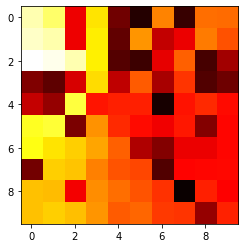

72


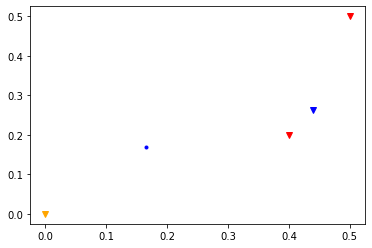

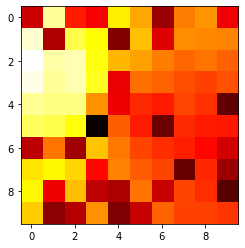

73


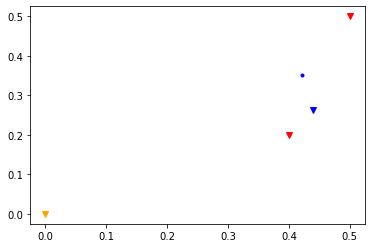

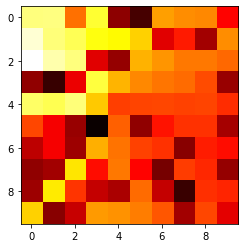

74


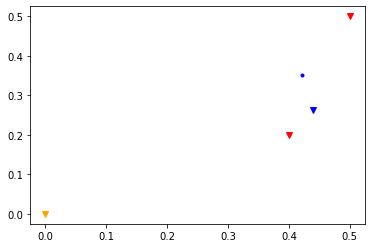

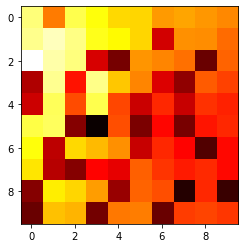

75


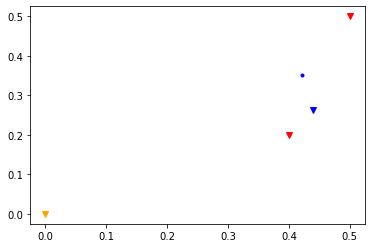

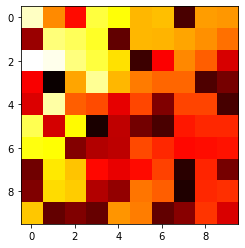

76


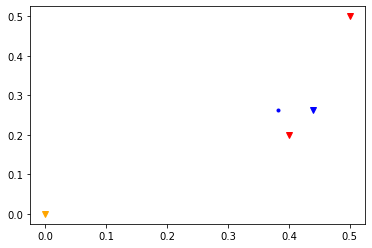

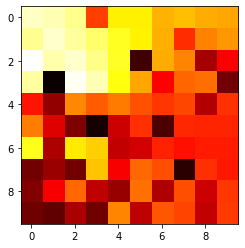

77


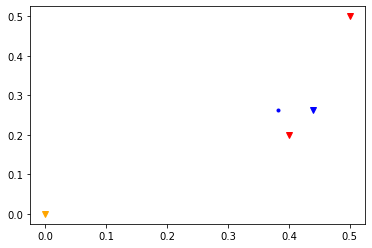

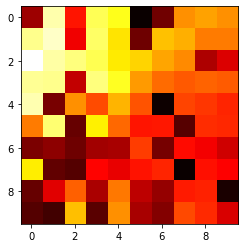

78


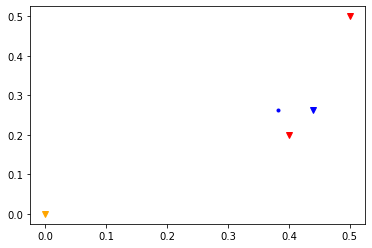

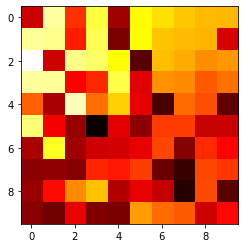

79


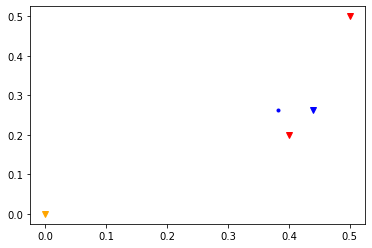

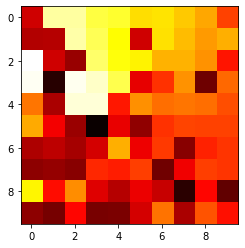

80


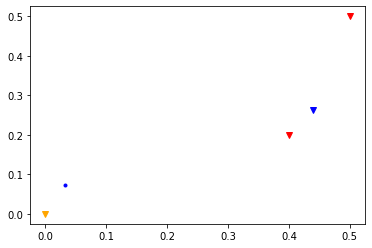

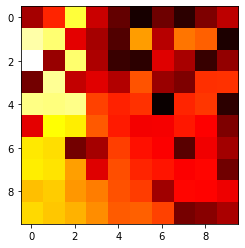

81


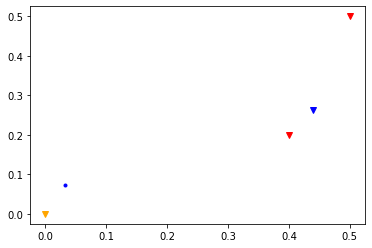

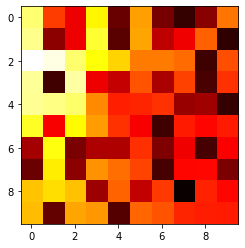

82


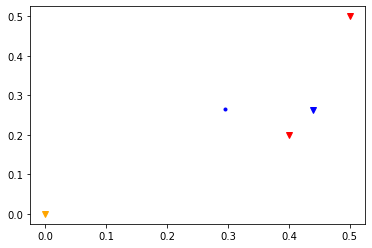

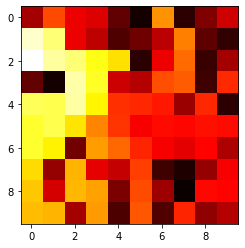

83


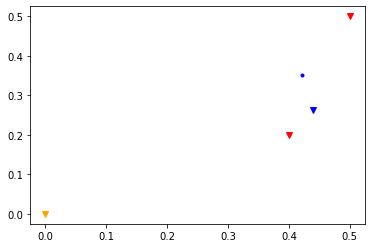

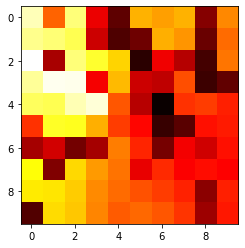

84


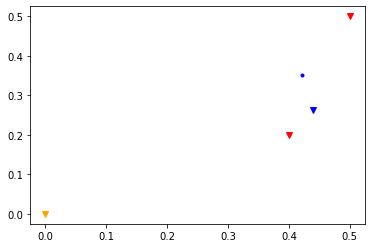

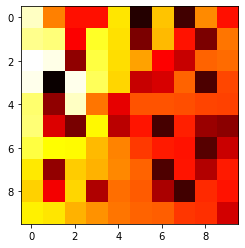

85


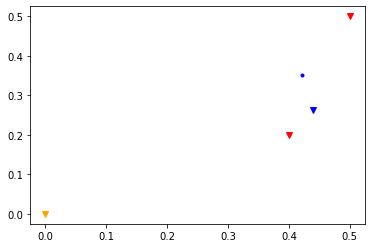

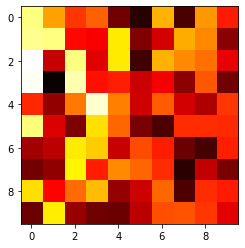

86


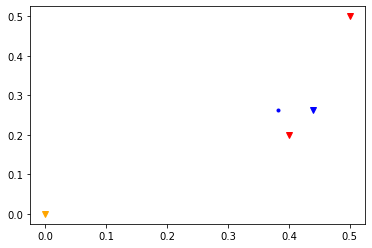

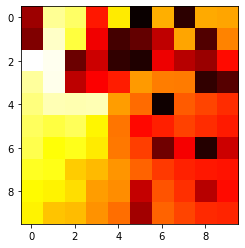

87


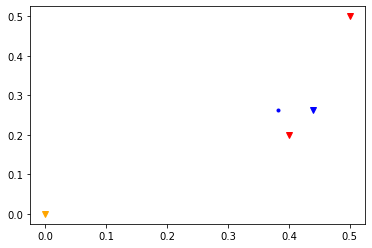

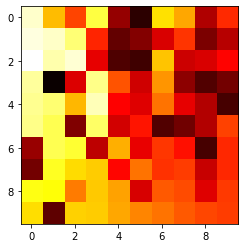

88


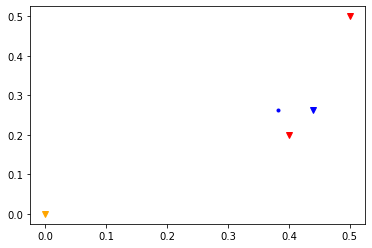

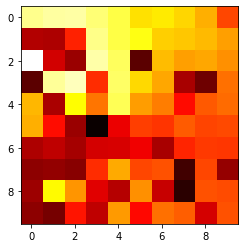

89


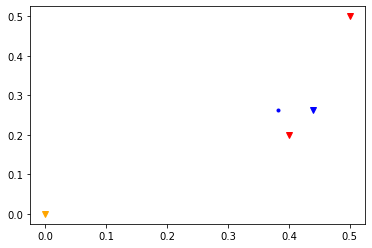

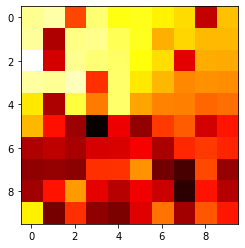

90


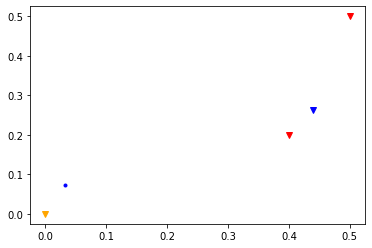

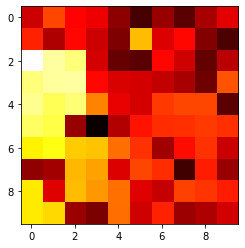

91


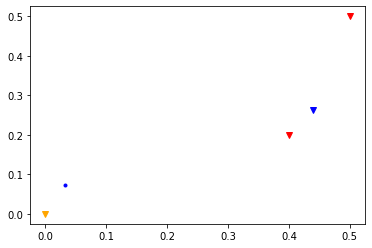

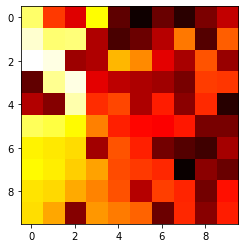

92


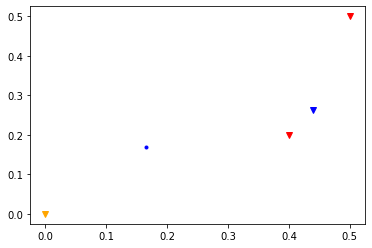

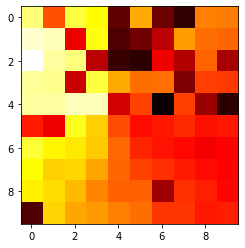

93


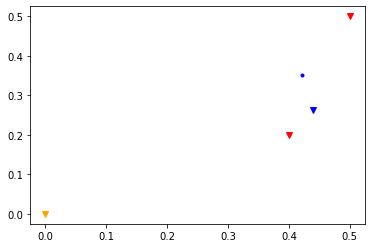

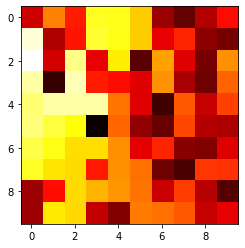

94


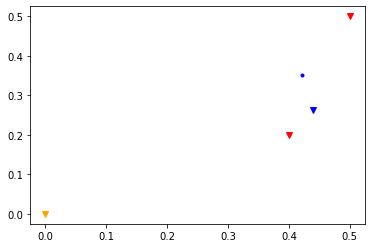

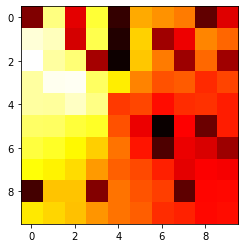

95


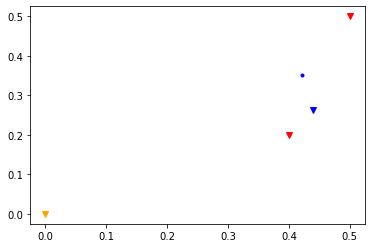

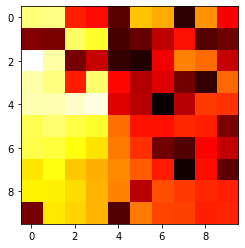

96


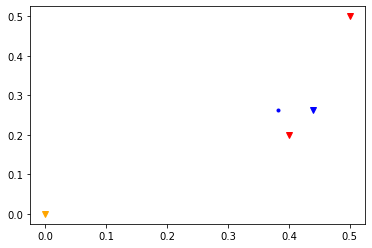

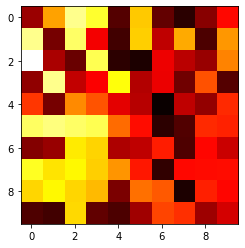

97


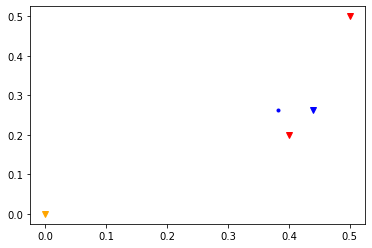

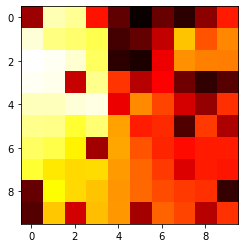

98


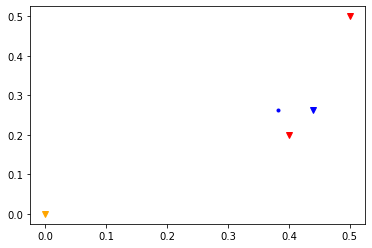

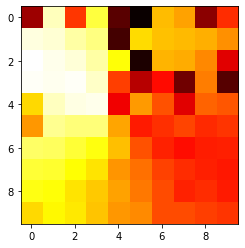

99


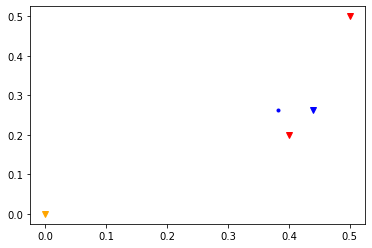

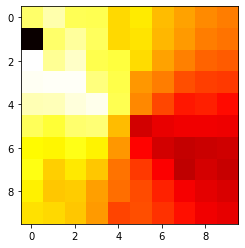

In [11]:
for i in range(100):
    print(i)
    rep_index = pose_som.select_winner(som_q_learner.w[i, :som_q_learner.state_dim])
    plt.plot(pose_som.w[rep_index, 0], pose_som.w[rep_index, 1], marker='.', linestyle='None', color='blue')
    
    action_position = pose_som.w[torch.argmax(selector.w[i, 2:], dim=0)]
    plt.plot(action_position[0], action_position[1], marker='v', linestyle='None', color='blue')
    
    plt.plot(0.0, 0.0, marker='v', linestyle='None', color='orange')
    plt.plot(np.array(task.goal)[0], np.array(task.goal)[1], marker='v', linestyle='None', color='red')
    plt.plot(0.5, 0.5, marker='v', linestyle='None', color='red')
    plt.show()
    
    plt.imshow(selector.w[i, 2:].reshape(10, 10), cmap='hot', interpolation='nearest')
    plt.show()

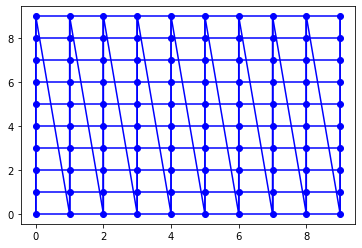

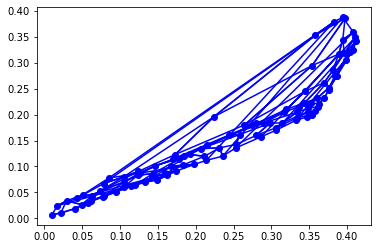

In [12]:
visualize_som(pose_som, [0, 1], location = True)
visualize_som(selector, [0, 1])

In [13]:
print(selector.w.shape)
print("Softmax Matrix")
print(softmax_matrix(selector.w[:, 2:]))
print("Action Matrix")
print(torch.argmax(softmax_matrix(selector.w[:, 2:]), dim=1).reshape(10, 10))

torch.Size([100, 102])
Softmax Matrix
tensor([[0.0161, 0.0180, 0.0127,  ..., 0.0064, 0.0058, 0.0052],
        [0.0229, 0.0143, 0.0198,  ..., 0.0040, 0.0045, 0.0166],
        [0.0177, 0.0161, 0.0253,  ..., 0.0043, 0.0043, 0.0049],
        ...,
        [0.0010, 0.0327, 0.0279,  ..., 0.0034, 0.0012, 0.0030],
        [0.0008, 0.0281, 0.0025,  ..., 0.0029, 0.0027, 0.0025],
        [0.0187, 0.0246, 0.0170,  ..., 0.0028, 0.0023, 0.0022]])
Action Matrix
tensor([[30, 20, 10, 10, 10, 10, 10, 10, 10, 10],
        [20, 20, 30, 20, 30, 10, 10, 10, 10,  1],
        [20, 20, 20, 30, 30, 30, 10, 10, 10,  0],
        [20, 20, 20, 20, 30, 20, 40, 10,  0,  0],
        [20, 20, 20, 20, 20, 20, 20, 61, 61,  0],
        [20, 20, 20, 20, 20, 20, 20, 20, 61,  0],
        [20, 20, 20, 20, 20, 20, 20, 20, 20, 20],
        [20, 20, 20, 20, 20, 20, 20, 20, 20, 20],
        [20, 20, 20, 20, 20, 20, 20, 20, 20, 20],
        [20, 20, 20, 20, 20, 20, 20, 20, 20, 20]])


<ipython-input-9-754173eb14b3>:7: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_matrix[i] = softmax(torch_matrix[i])


Action Index:  0


<ipython-input-9-754173eb14b3>:7: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_matrix[i] = softmax(torch_matrix[i])


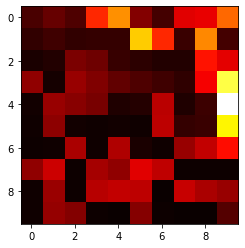

Action Index:  1


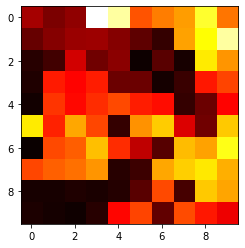

Action Index:  10


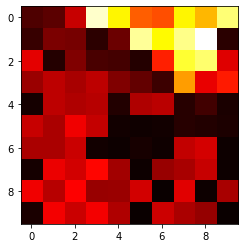

Action Index:  20


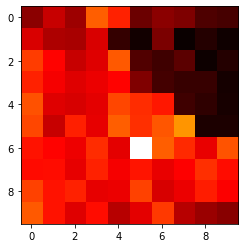

Action Index:  30


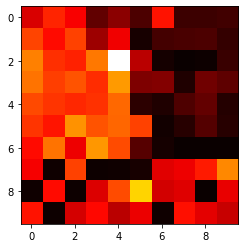

Action Index:  40


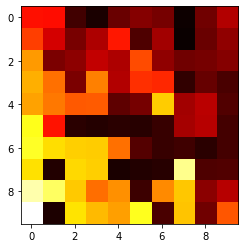

Action Index:  61


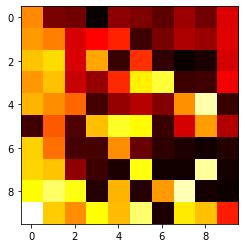

In [23]:
for i in [0, 1, 10, 20, 30, 40, 61]: #range(selector.w.shape[1]):
    print("Action Index: ", i)
    plt.imshow(softmax_matrix(selector.w[:, 2:])[:, i].reshape(10, 10), cmap='hot', interpolation='nearest')
    plt.show()

In [28]:
pose_som_filehandler = open("../data/selector_pose_ik/navigation_task_multi_target/pose_som.obj", 'rb')
pose_som = pickle.load(pose_som_filehandler)

som_q_learner_filehandler = open("../data/selector_pose_ik/navigation_task_multi_target/som_q_learner_all_neighbor.obj", 'rb')
som_q_learner = pickle.load(som_q_learner_filehandler)

0


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


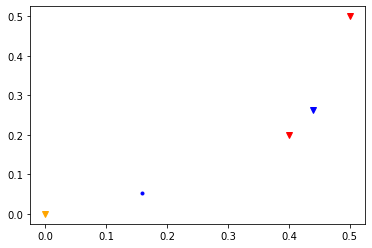

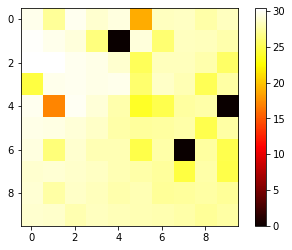

1


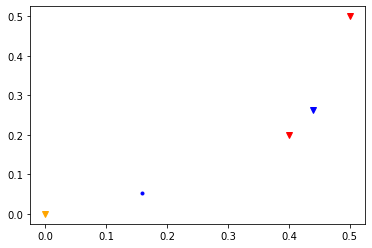

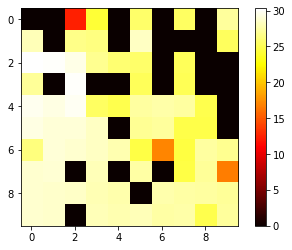

2


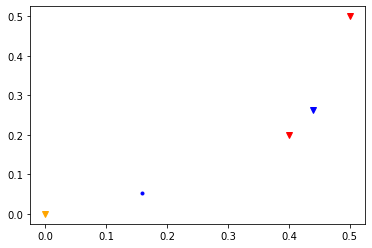

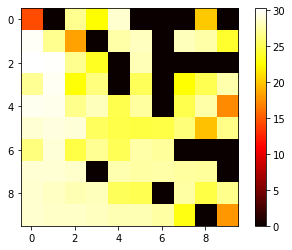

3


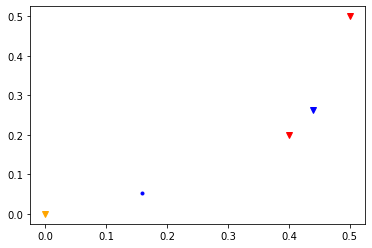

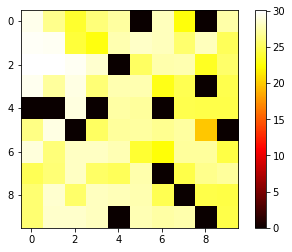

4


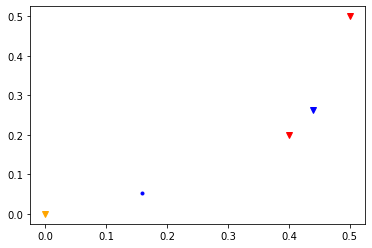

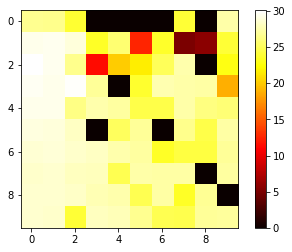

5


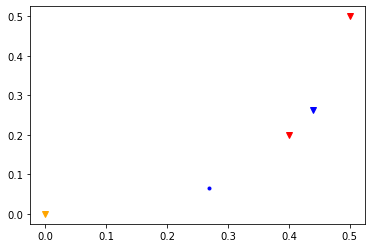

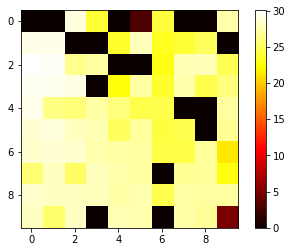

6


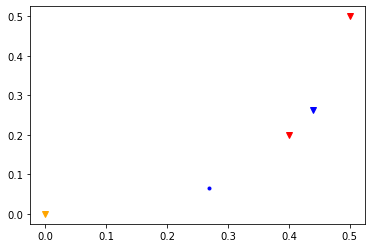

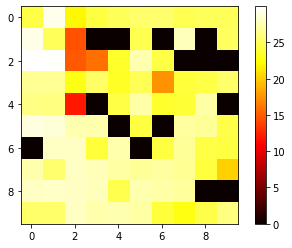

7


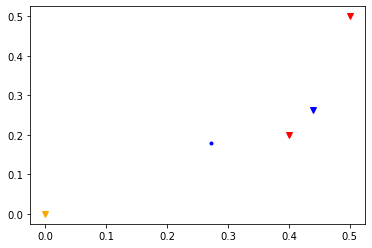

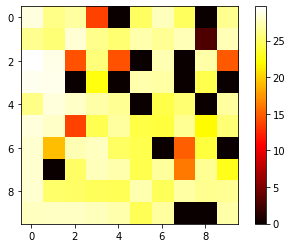

8


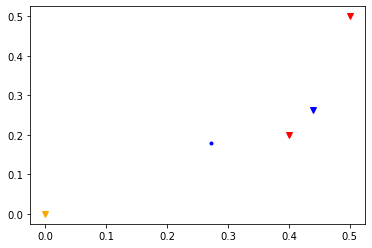

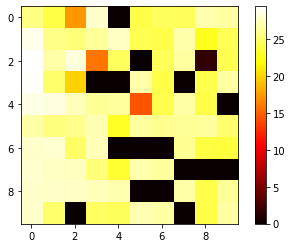

9


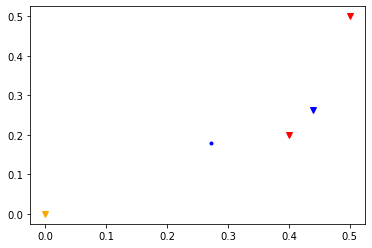

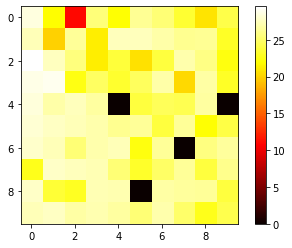

10


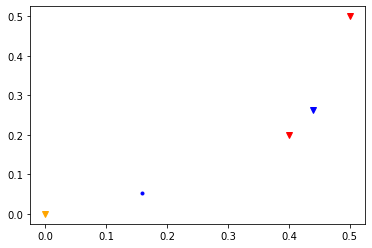

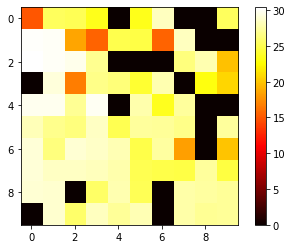

11


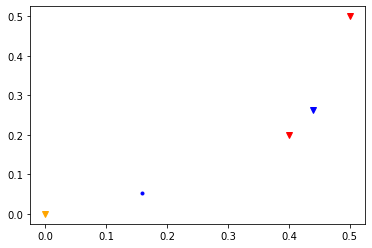

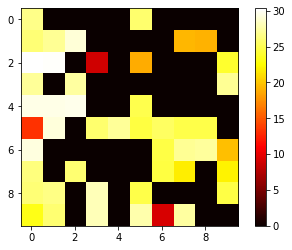

12


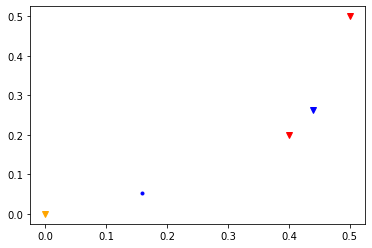

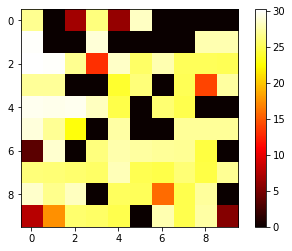

13


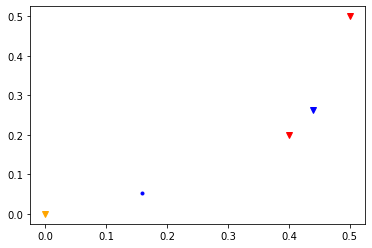

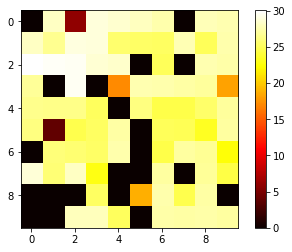

14


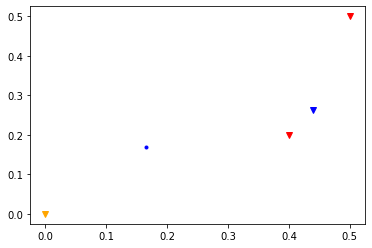

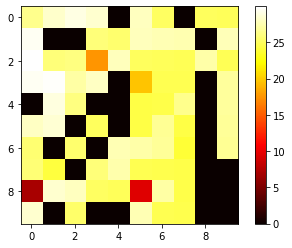

15


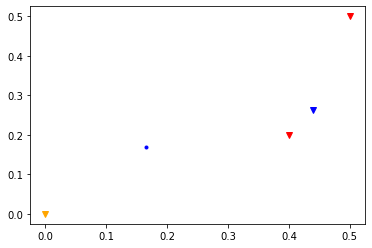

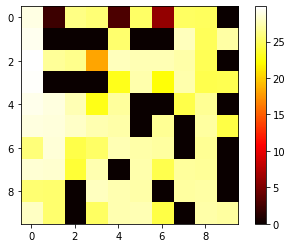

16


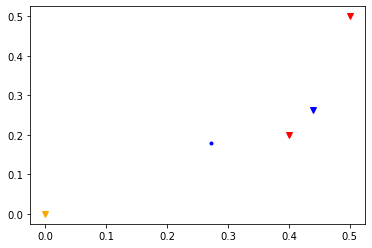

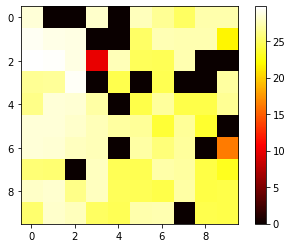

17


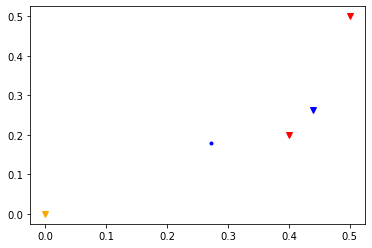

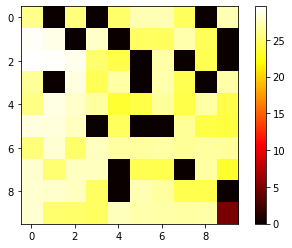

18


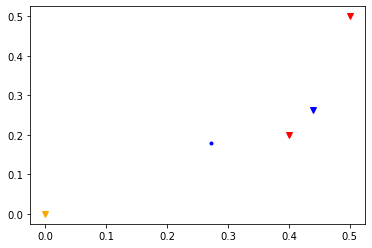

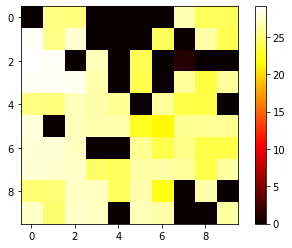

19


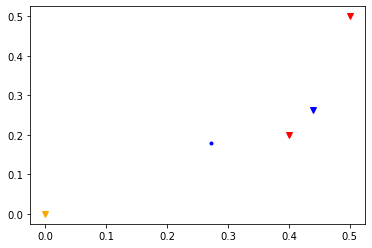

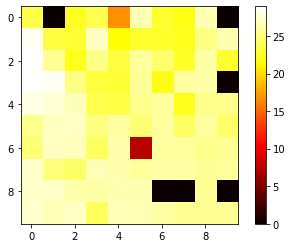

20


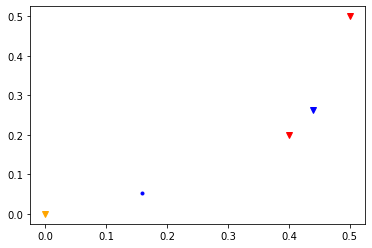

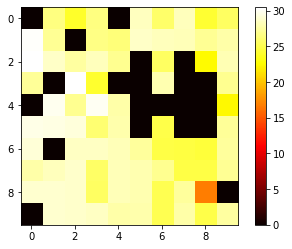

21


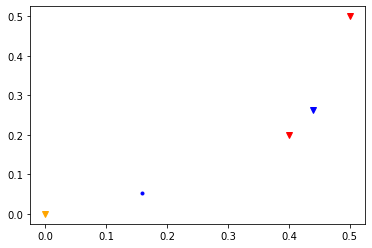

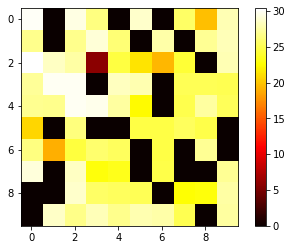

22


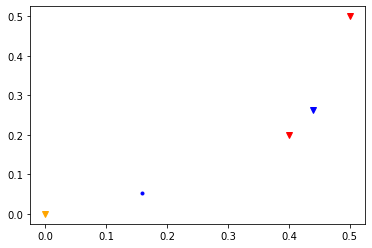

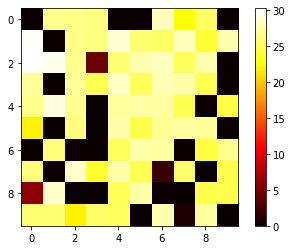

23


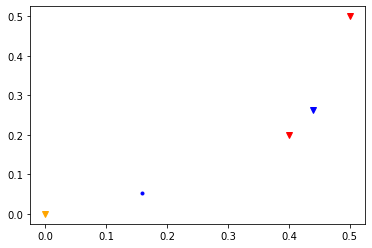

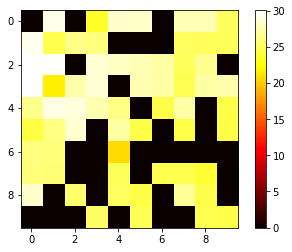

24


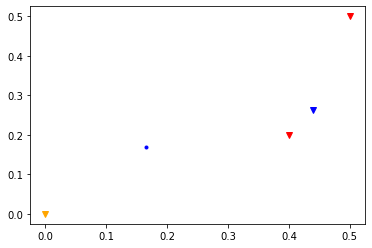

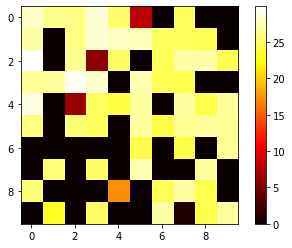

25


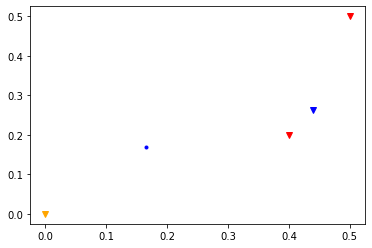

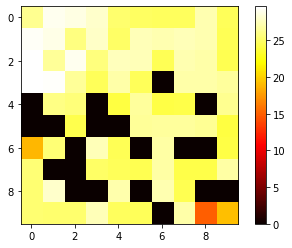

26


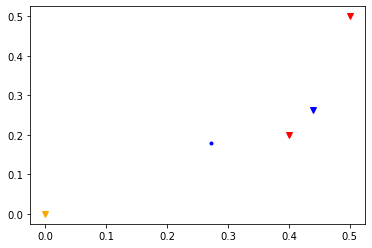

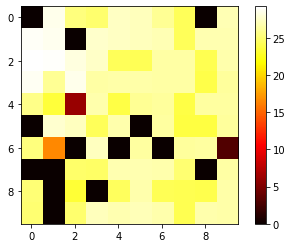

27


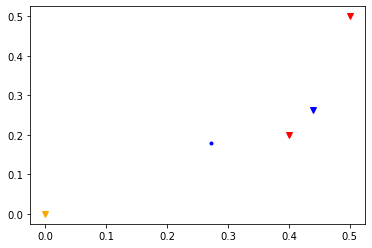

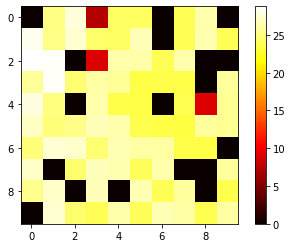

28


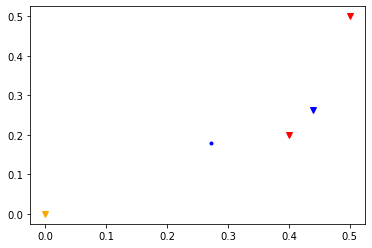

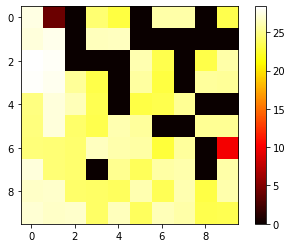

29


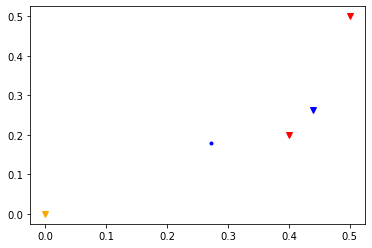

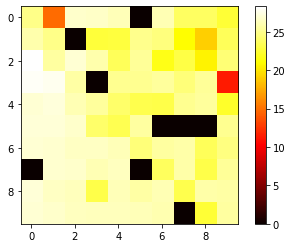

30


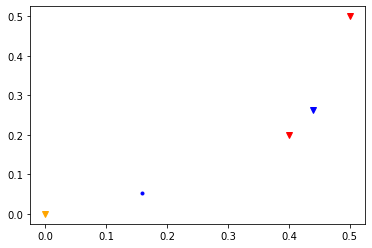

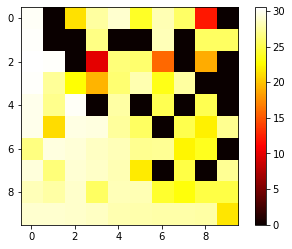

31


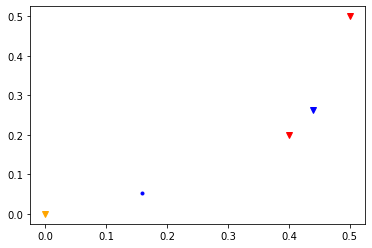

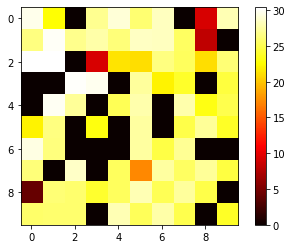

32


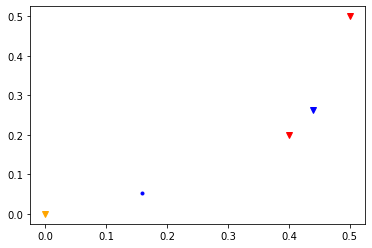

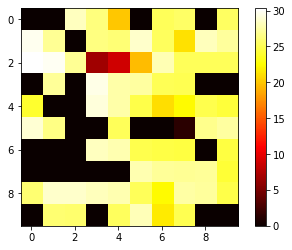

33


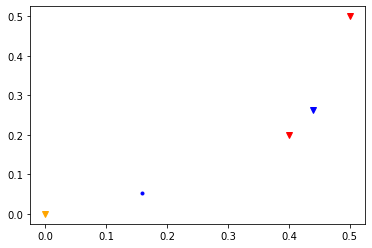

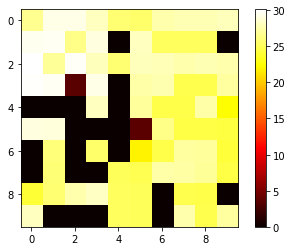

34


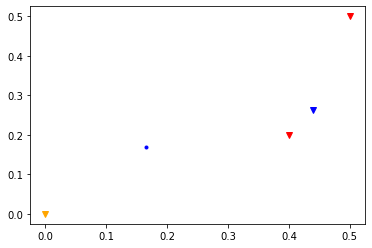

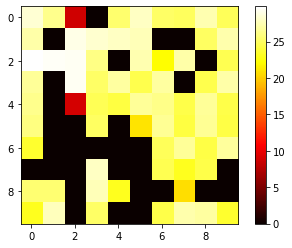

35


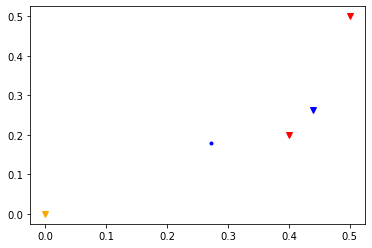

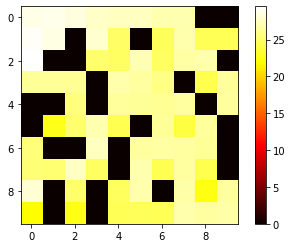

36


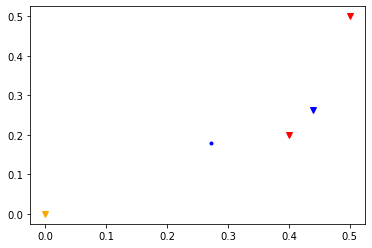

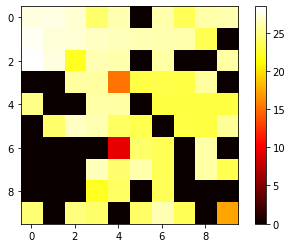

37


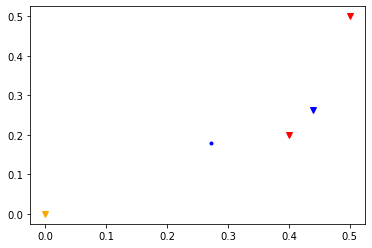

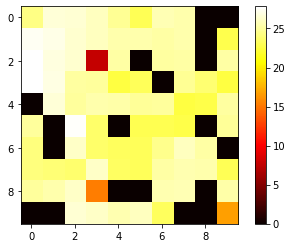

38


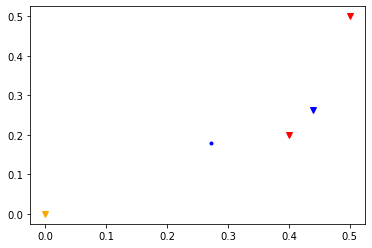

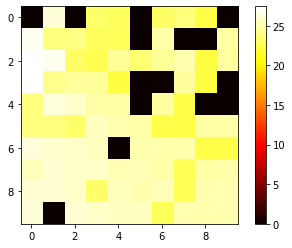

39


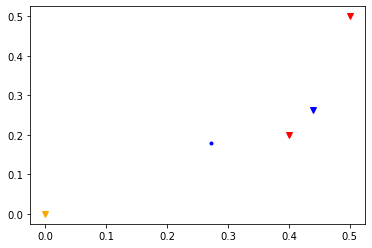

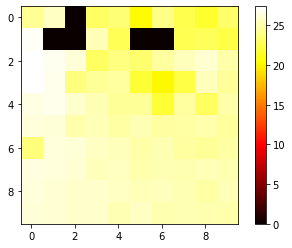

40


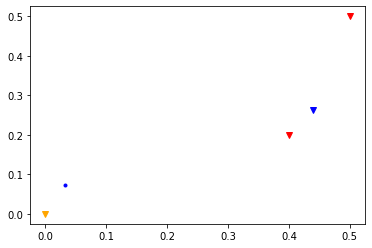

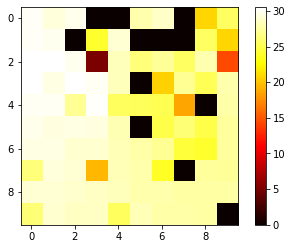

41


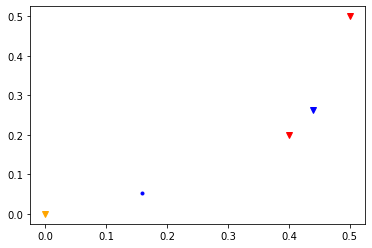

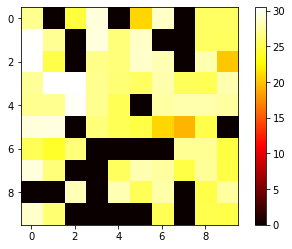

42


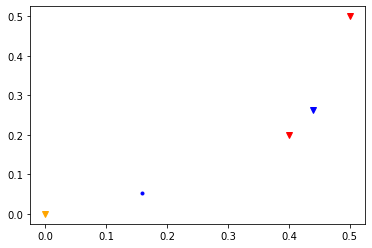

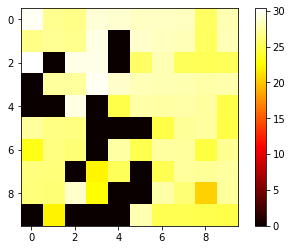

43


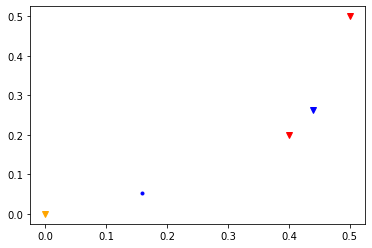

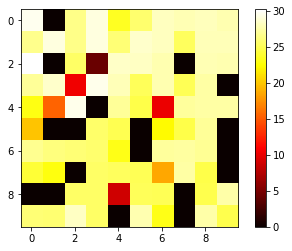

44


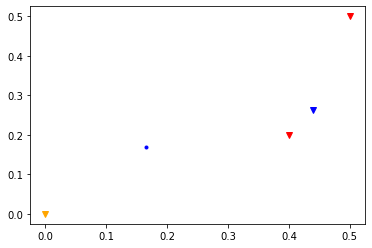

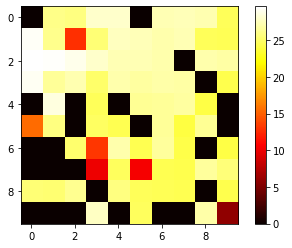

45


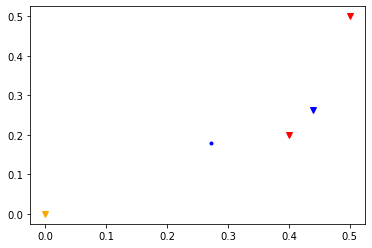

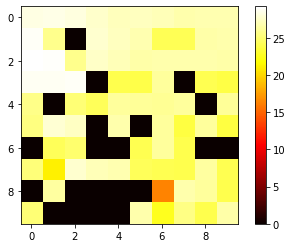

46


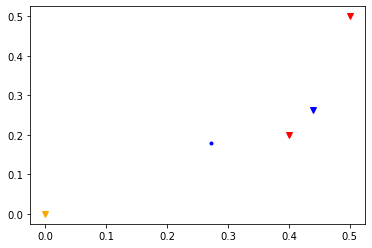

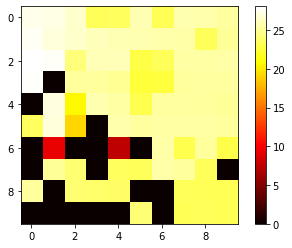

47


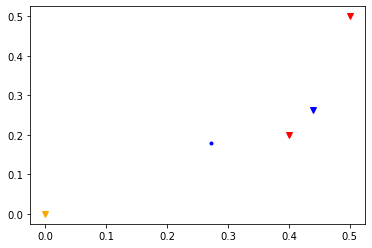

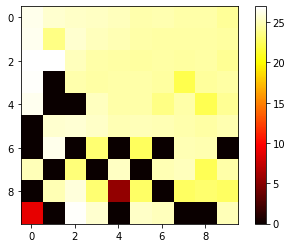

48


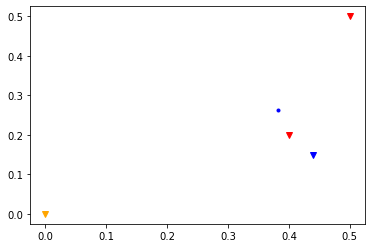

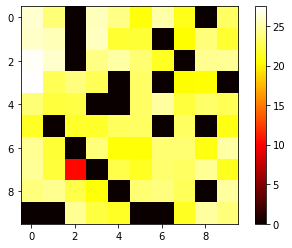

49


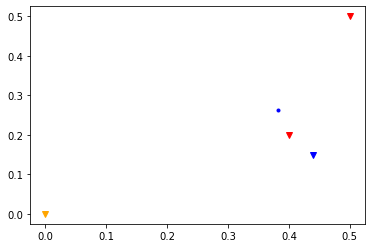

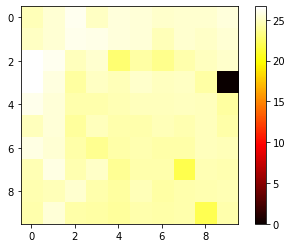

50


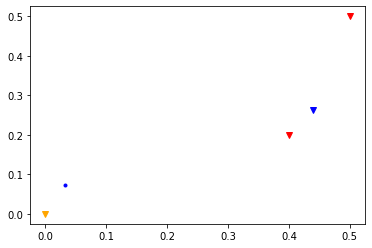

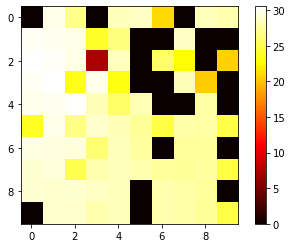

51


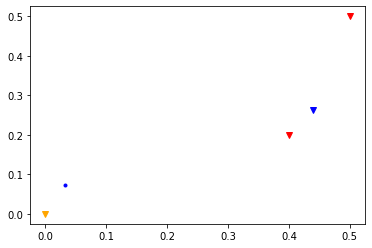

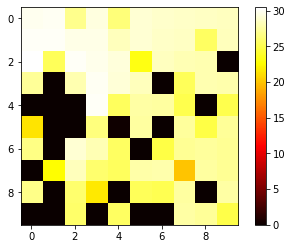

52


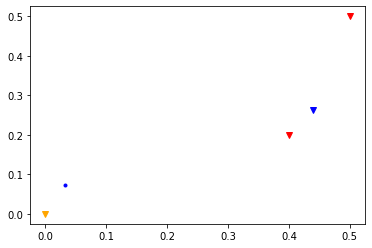

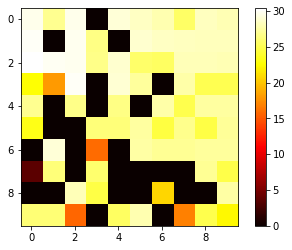

53


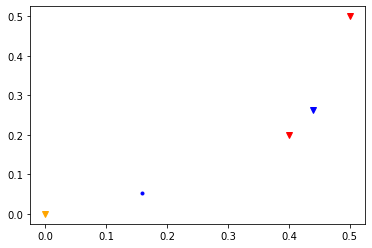

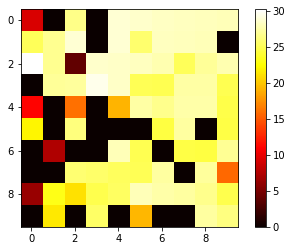

54


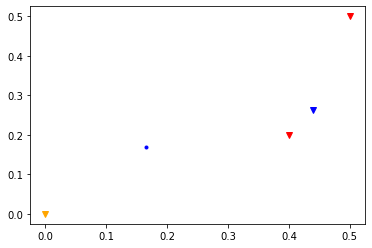

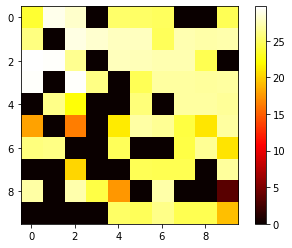

55


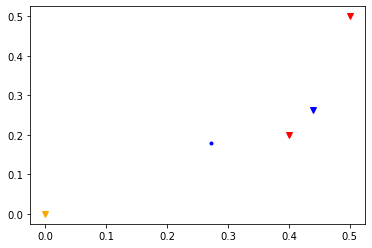

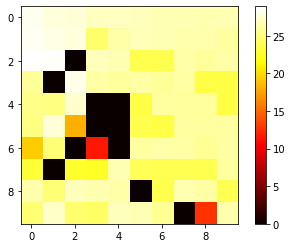

56


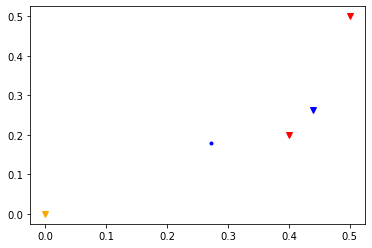

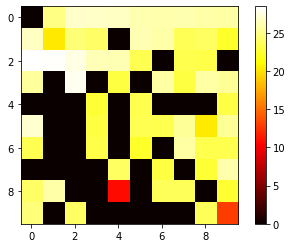

57


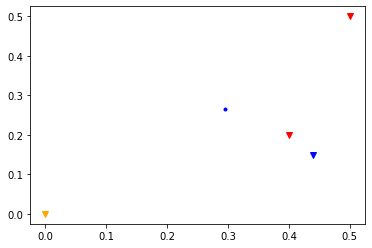

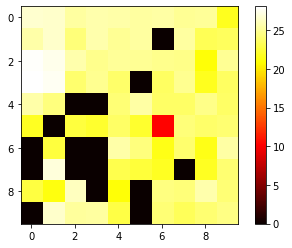

58


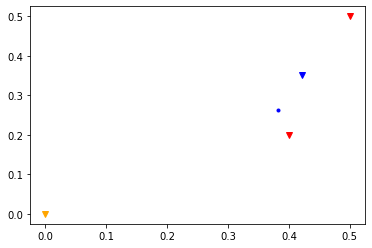

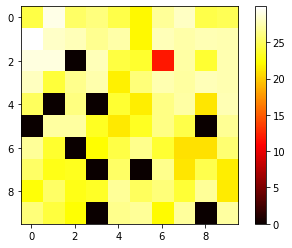

59


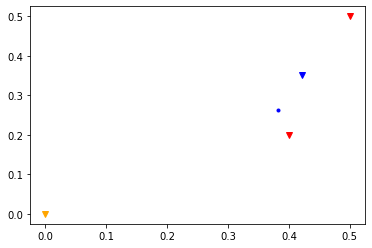

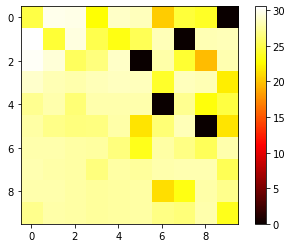

60


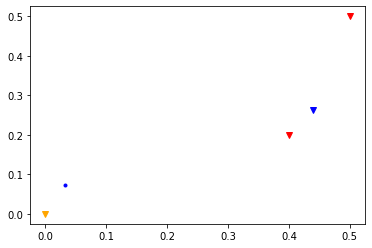

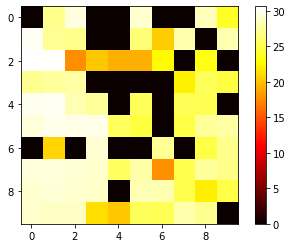

61


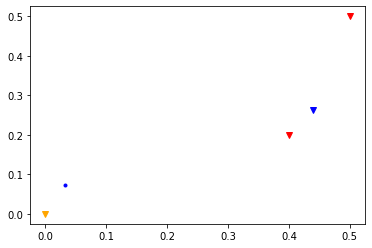

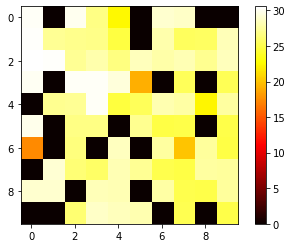

62


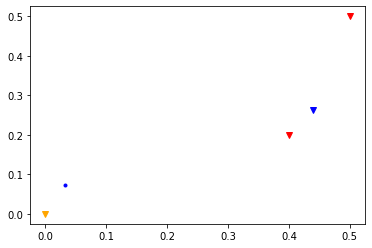

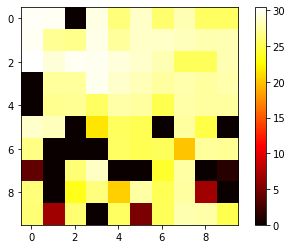

63


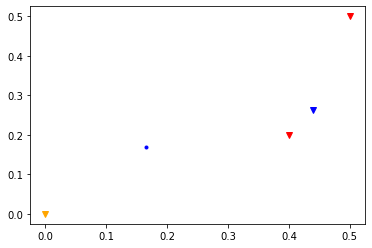

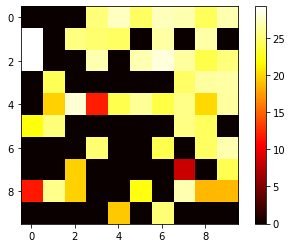

64


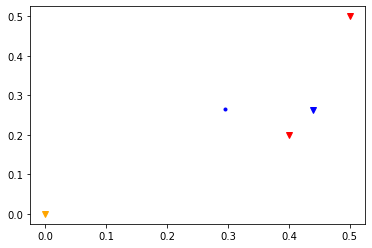

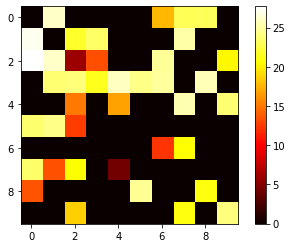

65


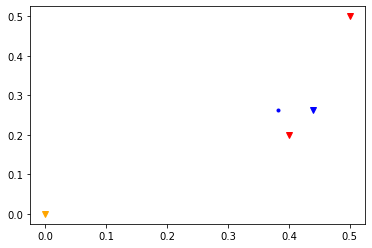

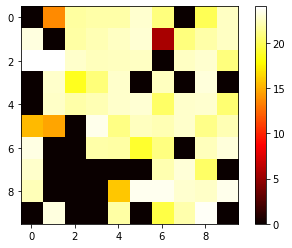

66


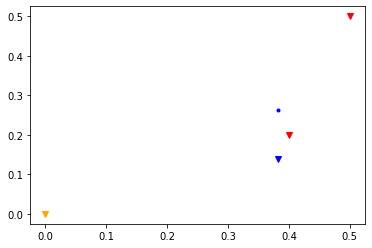

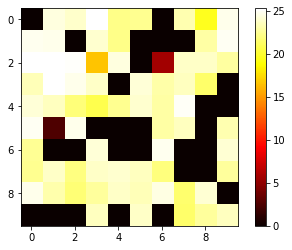

67


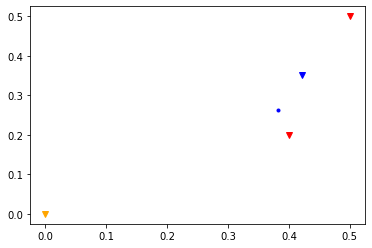

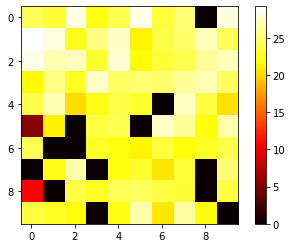

68


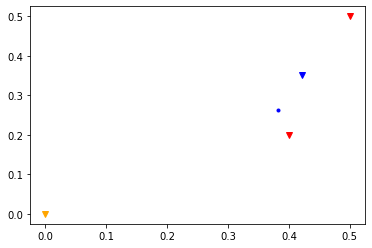

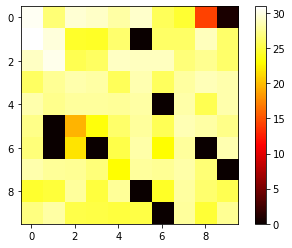

69


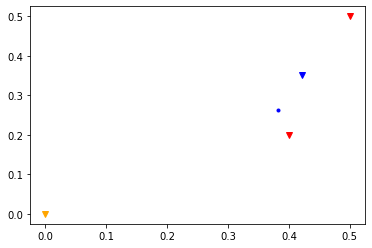

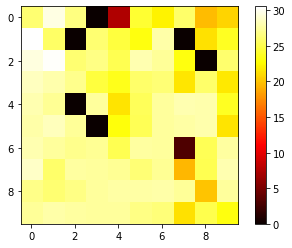

70


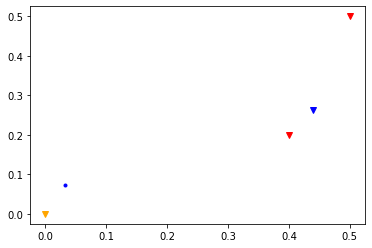

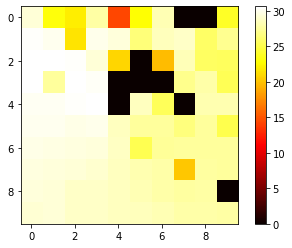

71


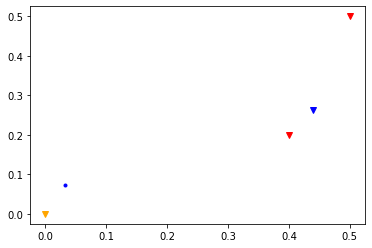

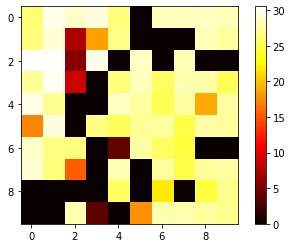

72


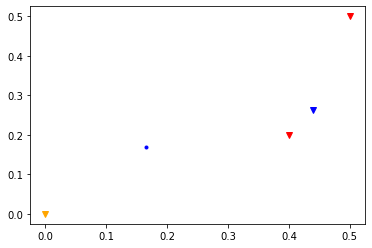

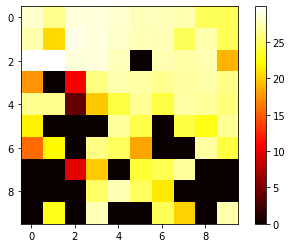

73


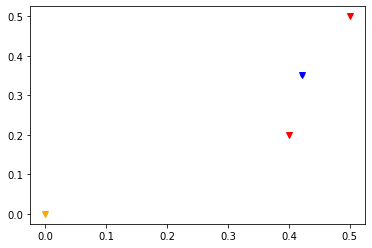

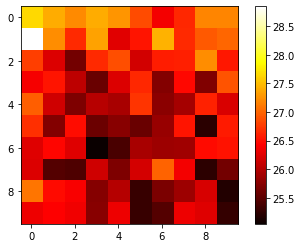

74


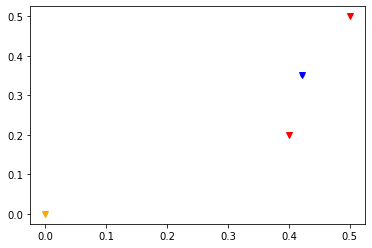

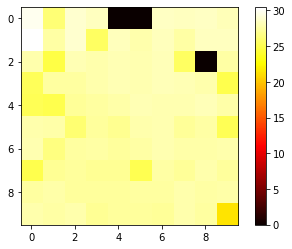

75


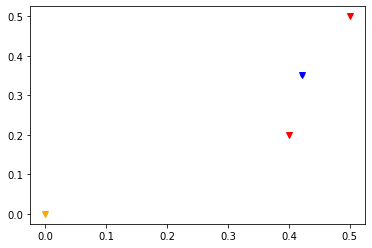

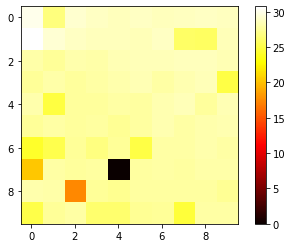

76


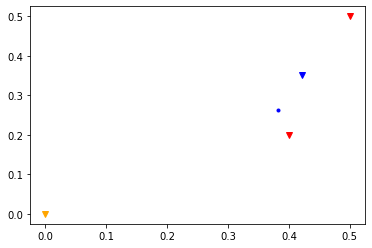

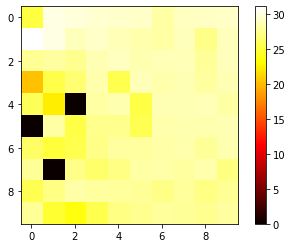

77


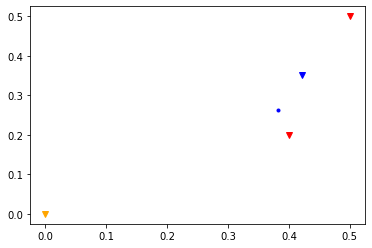

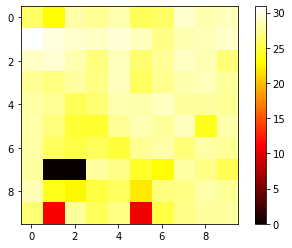

78


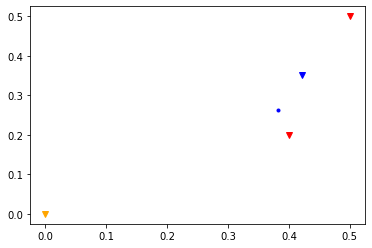

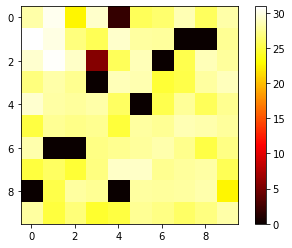

79


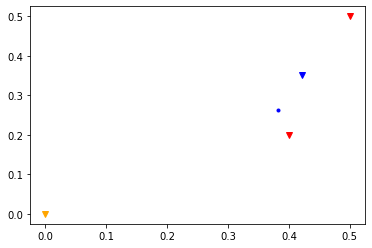

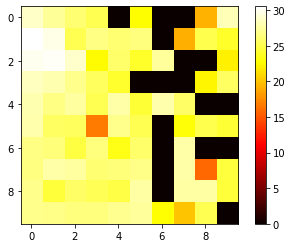

80


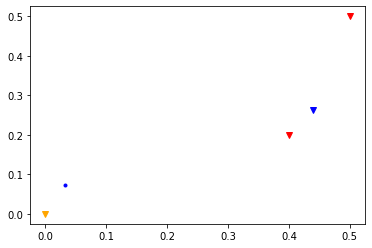

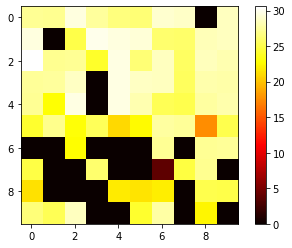

81


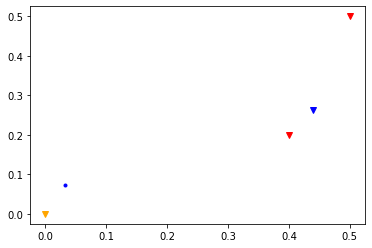

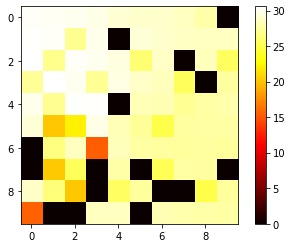

82


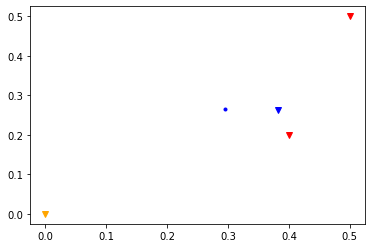

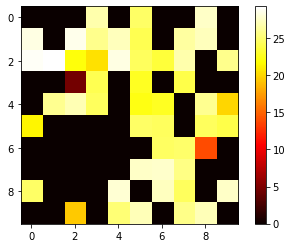

83


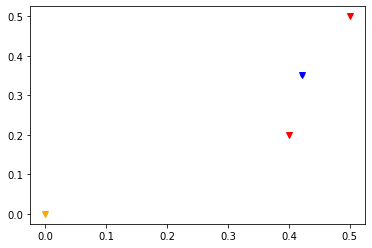

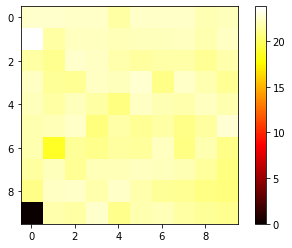

84


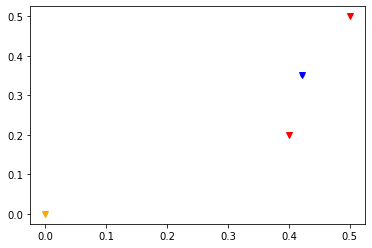

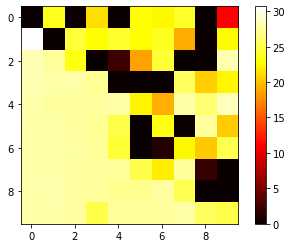

85


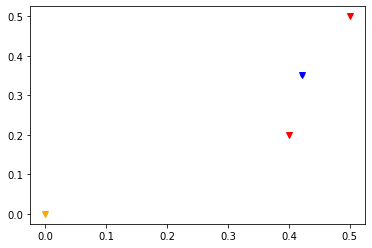

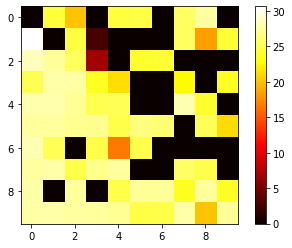

86


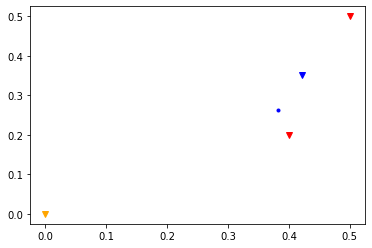

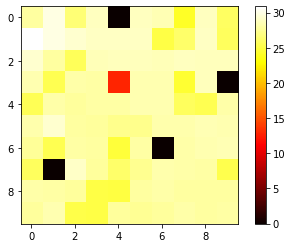

87


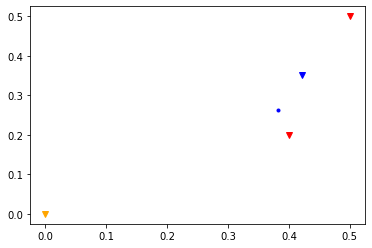

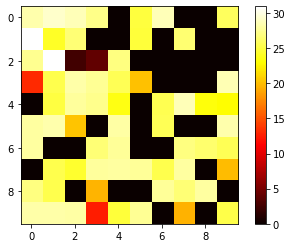

88


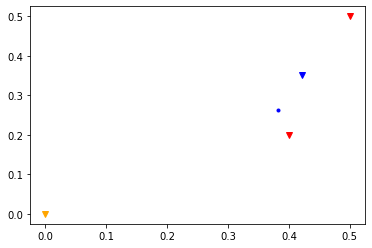

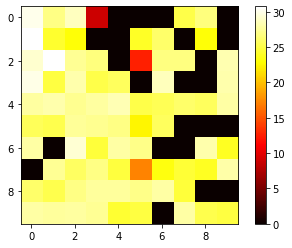

89


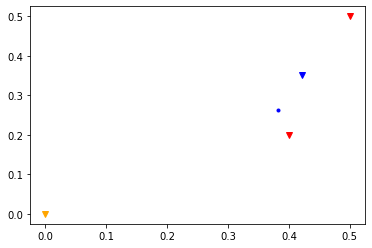

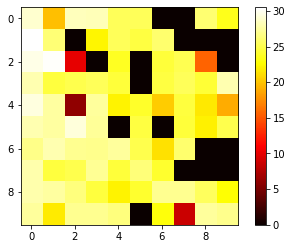

90


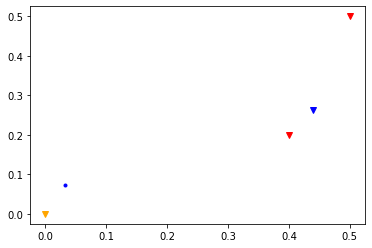

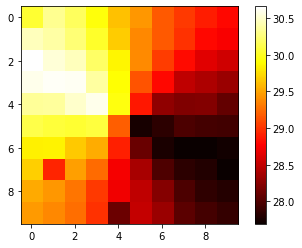

91


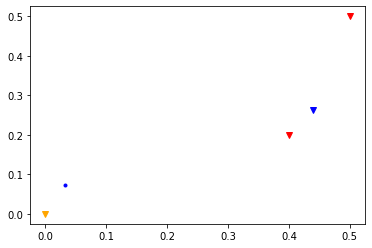

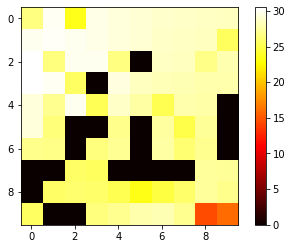

92


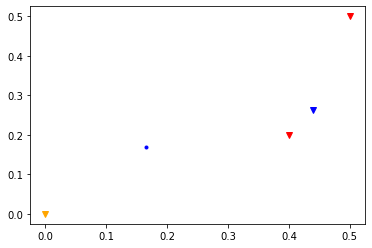

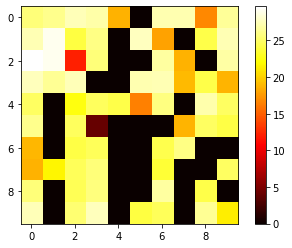

93


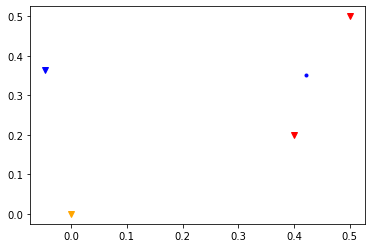

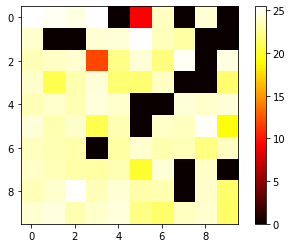

94


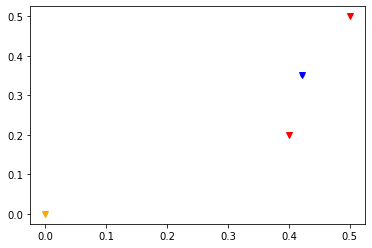

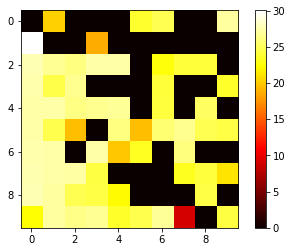

95


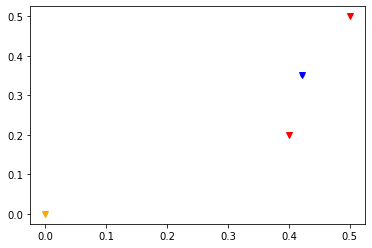

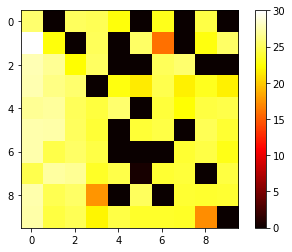

96


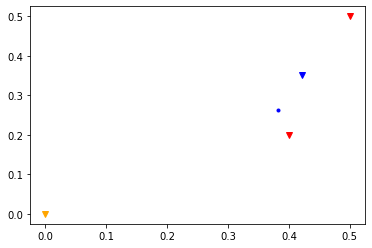

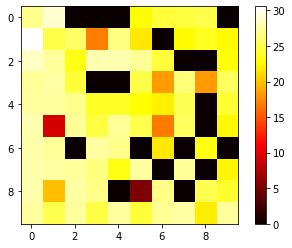

97


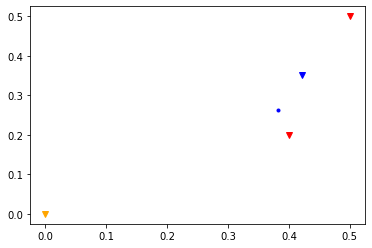

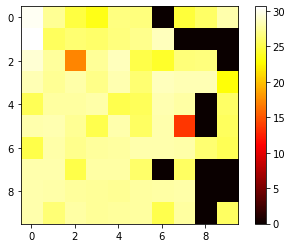

98


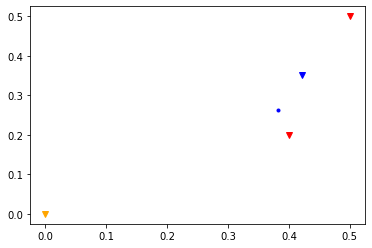

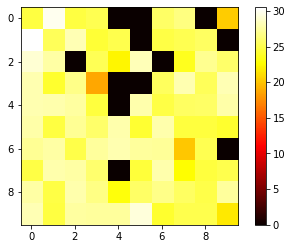

99


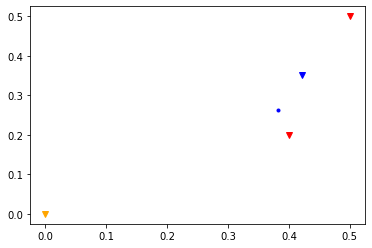

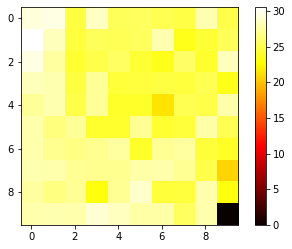

In [29]:
for i in range(100):
    print(i)
    rep_index = pose_som.select_winner(som_q_learner.w[i, :som_q_learner.state_dim])
    plt.plot(pose_som.w[rep_index, 0], pose_som.w[rep_index, 1], marker='.', linestyle='None', color='blue')
    
    action_position = pose_som.w[torch.argmax(selector.w[i, 2:], dim=0)]
    plt.plot(action_position[0], action_position[1], marker='v', linestyle='None', color='blue')
    
    plt.plot(0.0, 0.0, marker='v', linestyle='None', color='orange')
    plt.plot(np.array(task.goal)[0], np.array(task.goal)[1], marker='v', linestyle='None', color='red')
    plt.plot(0.5, 0.5, marker='v', linestyle='None', color='red')
    plt.show()
    
    plt.imshow(selector.w[i, 2:].reshape(10, 10), cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.show()

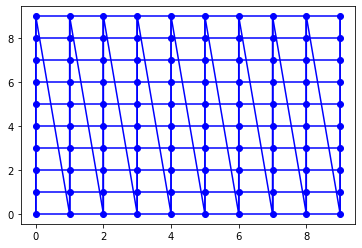

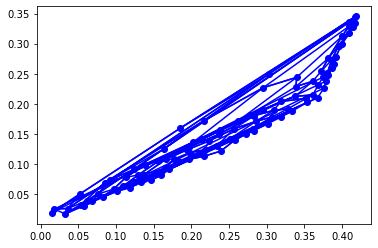

In [33]:
visualize_som(pose_som, [0, 1], location = True)
visualize_som(selector, [0, 1])

In [34]:
print(selector.w.shape)
print("Softmax Matrix")
print(softmax_matrix(selector.w[:, 2:]))
print("Action Matrix")
print(torch.argmax(softmax_matrix(selector.w[:, 2:]), dim=1).reshape(10, 10))

torch.Size([100, 102])
Softmax Matrix
tensor([[2.9600e-02, 2.4035e-03, 3.0578e-02,  ..., 3.9347e-03, 2.3555e-03,
         3.2621e-03],
        [6.6661e-15, 6.6549e-15, 1.6583e-09,  ..., 6.5292e-03, 4.5682e-04,
         4.6875e-03],
        [1.3899e-08, 7.2201e-15, 3.3737e-03,  ..., 7.9766e-05, 7.2146e-15,
         4.0810e-07],
        ...,
        [1.1713e-01, 6.9640e-03, 5.3974e-04,  ..., 9.3744e-03, 9.3755e-15,
         1.3941e-03],
        [6.8094e-04, 1.3277e-01, 6.9372e-04,  ..., 9.7018e-04, 9.8866e-04,
         3.4883e-05],
        [5.6816e-02, 7.3381e-02, 5.6591e-04,  ..., 1.2274e-03, 1.3706e-02,
         9.5486e-15]])
Action Matrix
tensor([[20, 20, 20, 20, 20, 20, 20, 20, 20, 20],
        [20, 20, 20, 20, 20, 20, 20, 20, 20, 20],
        [20, 20, 20, 20, 20, 20, 20, 20, 20, 20],
        [20, 20, 20, 20, 20, 20, 20, 20, 20, 20],
        [20, 20, 20, 20, 20, 20, 20, 20, 30, 30],
        [20, 20, 20, 20, 20, 20, 20, 30, 10, 10],
        [20, 20, 20, 20, 20, 20, 31, 10, 10, 10],
  

<ipython-input-32-754173eb14b3>:7: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_matrix[i] = softmax(torch_matrix[i])


Action Index:  10


<ipython-input-32-754173eb14b3>:7: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_matrix[i] = softmax(torch_matrix[i])


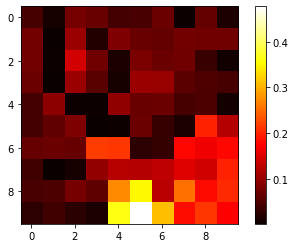

Action Index:  20


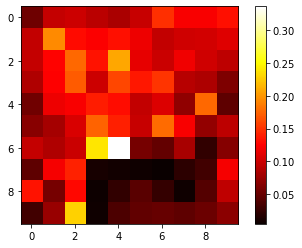

Action Index:  30


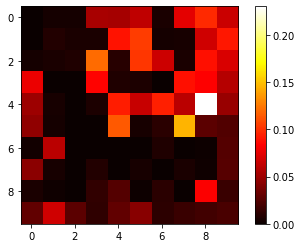

In [36]:
for i in [10, 20, 30]: #range(selector.w.shape[1]):
    print("Action Index: ", i)
    plt.imshow(softmax_matrix(selector.w[:, 2:])[:, i].reshape(10, 10), cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.show()

## Baseline

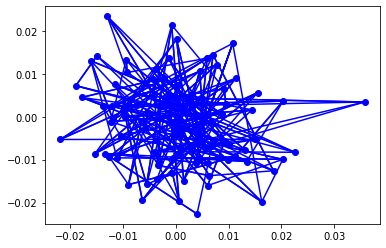

0


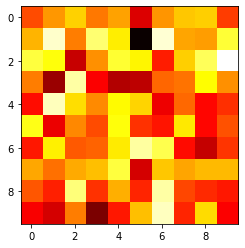

1


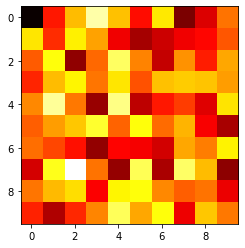

2


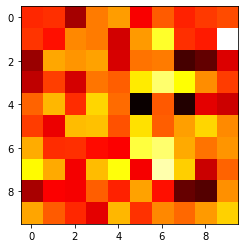

3


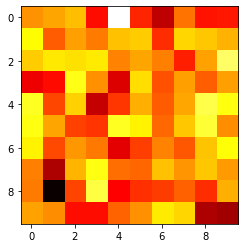

4


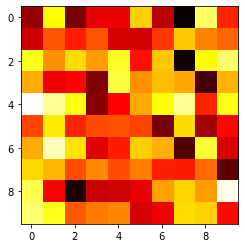

5


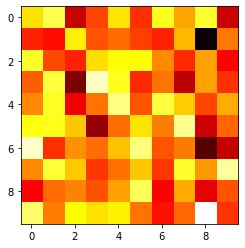

6


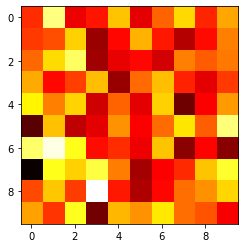

7


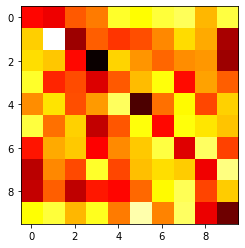

8


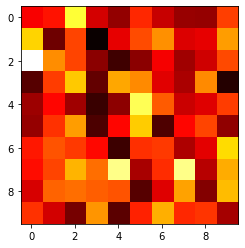

9


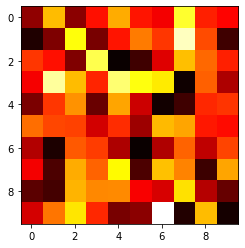

10


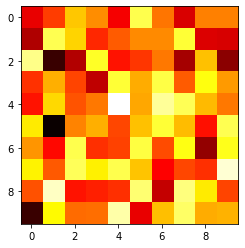

11


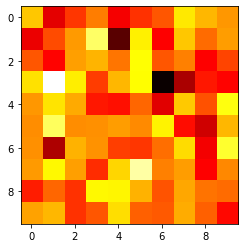

12


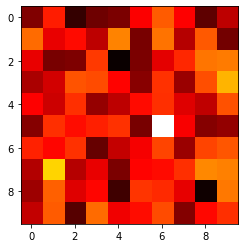

13


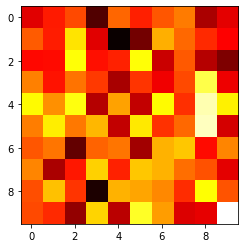

14


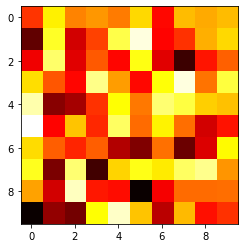

15


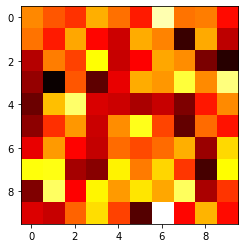

16


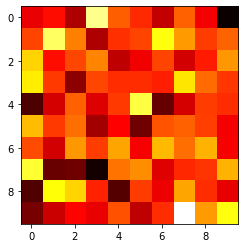

17


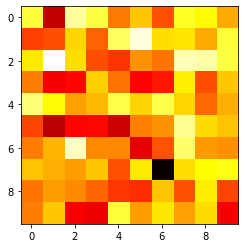

18


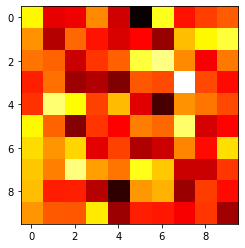

19


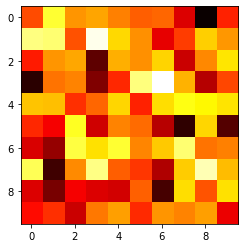

20


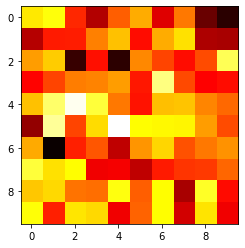

21


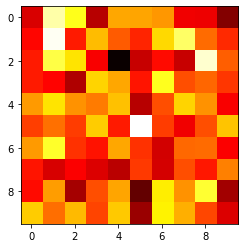

22


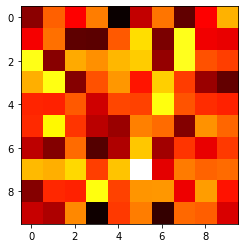

23


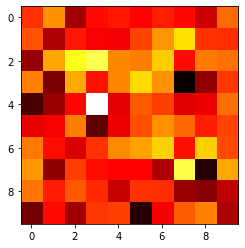

24


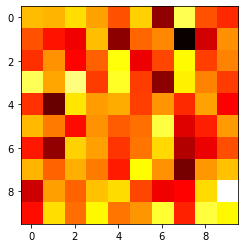

25


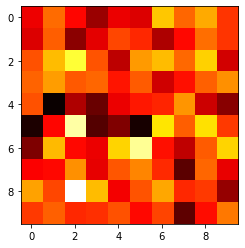

26


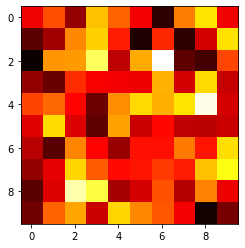

27


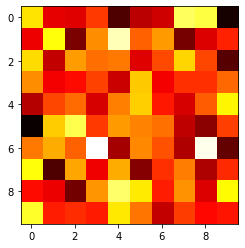

28


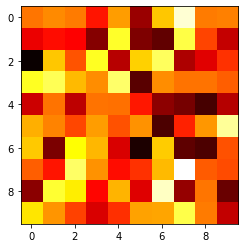

29


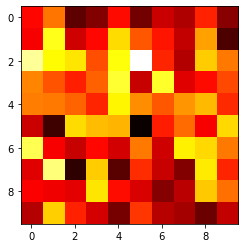

30


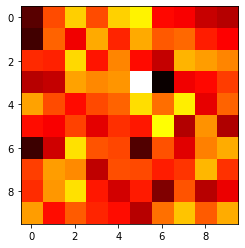

31


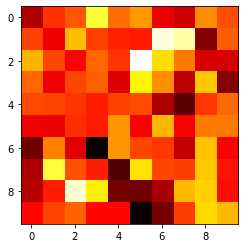

32


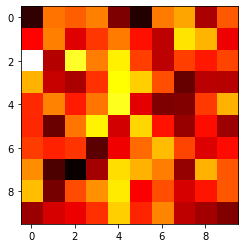

33


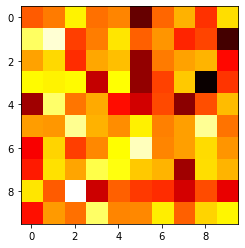

34


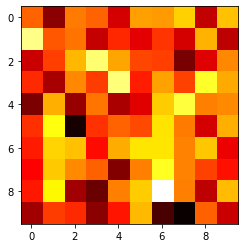

35


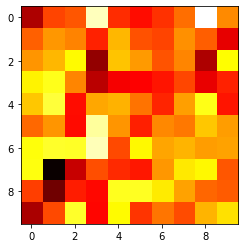

36


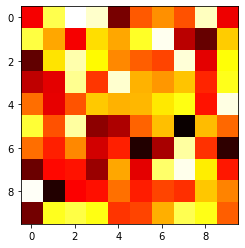

37


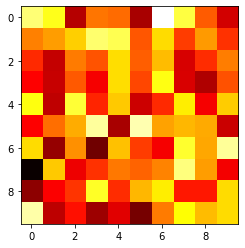

38


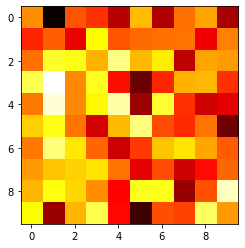

39


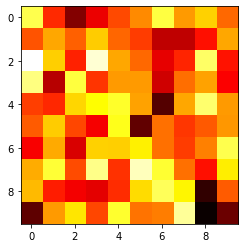

40


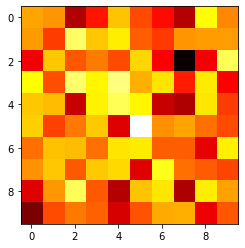

41


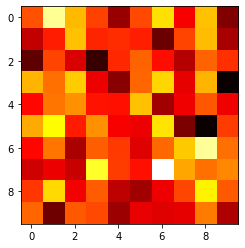

42


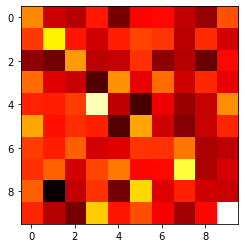

43


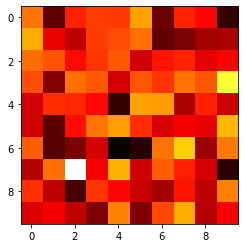

44


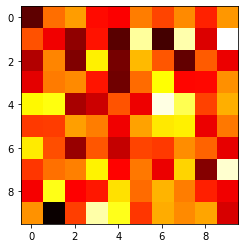

45


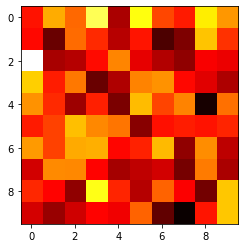

46


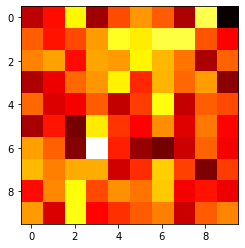

47


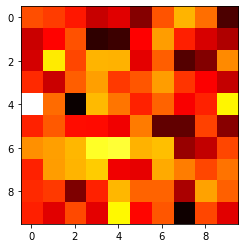

48


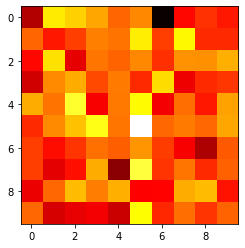

49


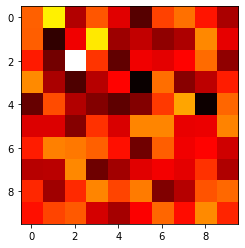

50


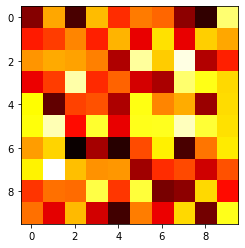

51


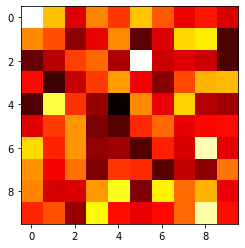

52


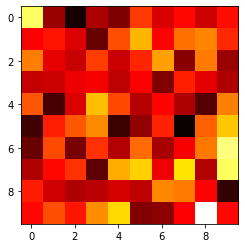

53


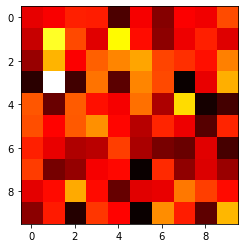

54


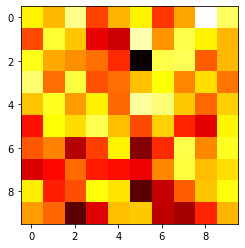

55


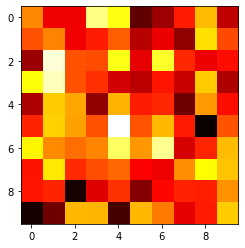

56


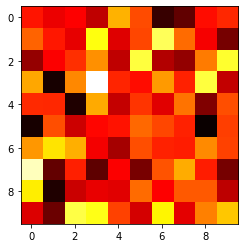

57


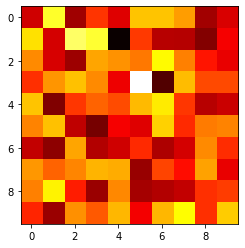

58


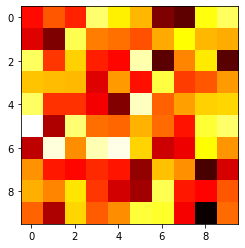

59


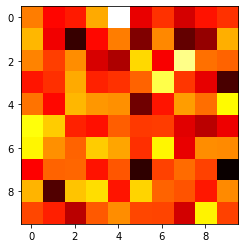

60


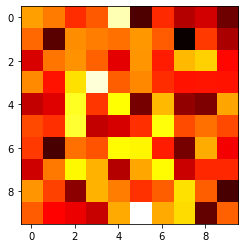

61


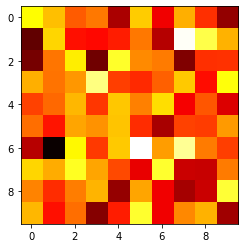

62


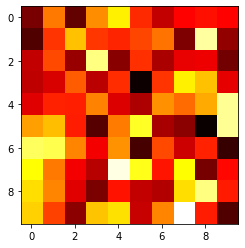

63


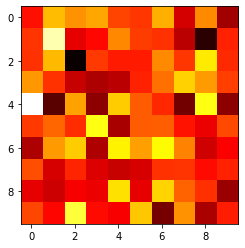

64


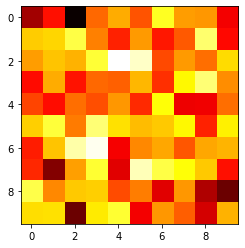

65


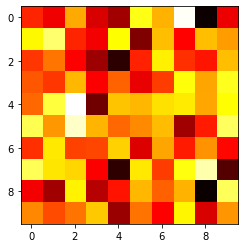

66


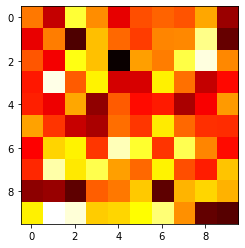

67


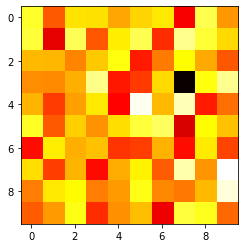

68


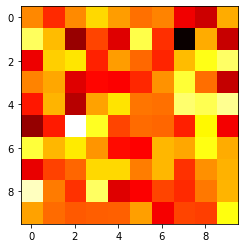

69


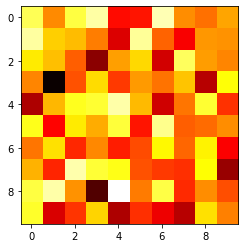

70


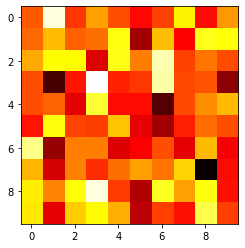

71


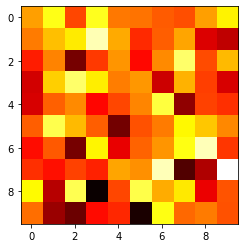

72


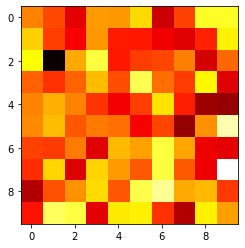

73


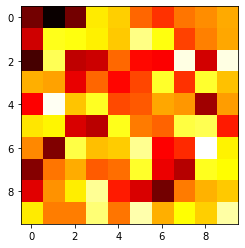

74


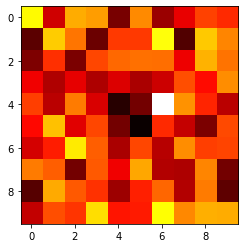

75


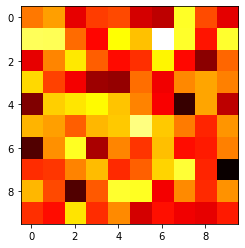

76


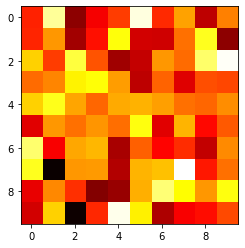

77


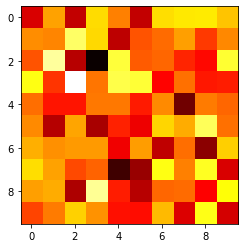

78


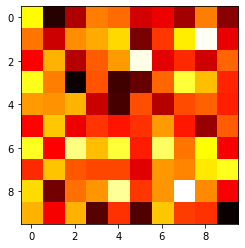

79


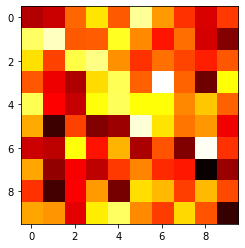

80


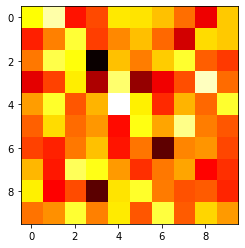

81


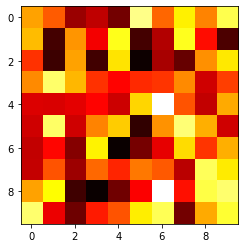

82


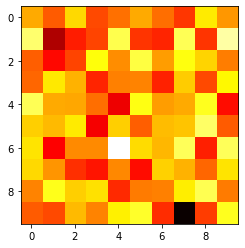

83


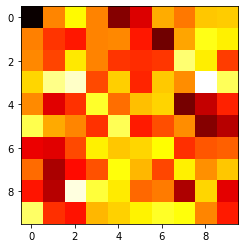

84


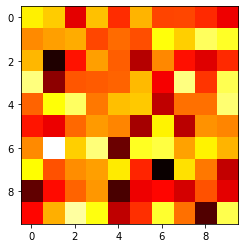

85


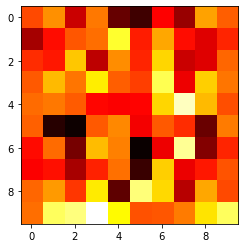

86


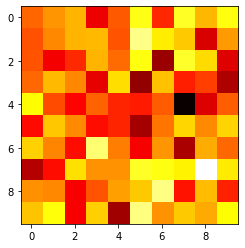

87


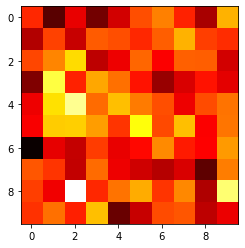

88


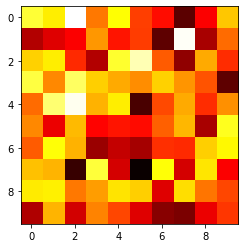

89


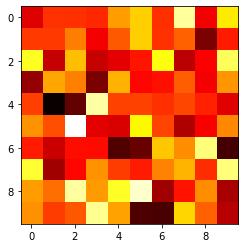

90


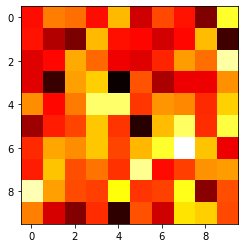

91


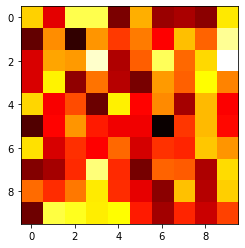

92


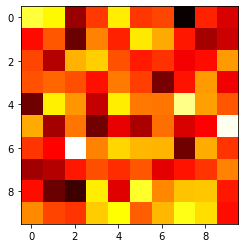

93


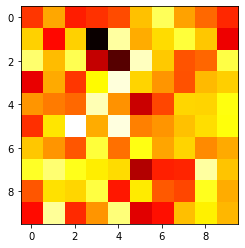

94


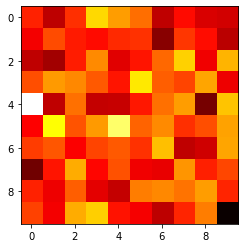

95


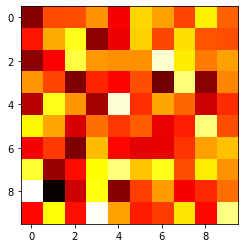

96


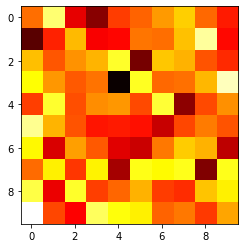

97


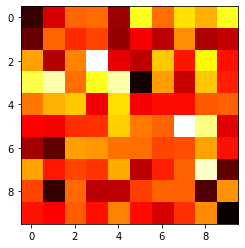

98


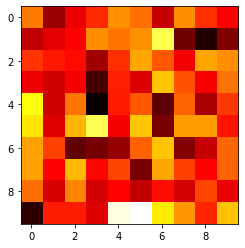

99


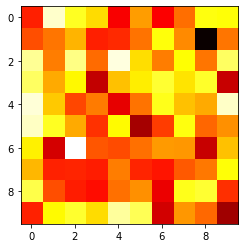

In [20]:
init_selector = SOMQLearnerAllNeighbor(total_nodes=100, state_dim = 2, action_som = pose_som, update_iterations=0)
visualize_som(init_selector, [0, 1])
for i in range(100):
    print(i)
    plt.imshow(init_selector.w[i, 2:].reshape(10, 10), cmap='hot', interpolation='nearest')
    plt.show()

In [21]:
from custom_env.navigation_task import NavigationTaskMultiTarget

baseline_maxtime = 100
baseline_return = 0
baseline_gamma = 0.9
task = NavigationTaskMultiTarget()

for t in range(baseline_maxtime):
    reward, _ = task.step(task.goal)
    baseline_return += (baseline_gamma ** t) * reward
    
task.reset()
print(baseline_return)

31.41263555084857
